In [3]:
#绘图字体和配色
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 16

class AcademicColors:
    """
    学术严谨风格配色方案
    基于Nature、Science等顶级科学期刊的设计理念
    """

    def __init__(self):
        # 主色板
        self.primary = '#333333'
        self.secondary = '#000000'
        self.background = '#F0F0F0'
        self.gridline = '#D9D9D9'

        # 分类色板（图表专用）
        self.categorical = [
            '#FF8C00',  # 明亮橙色 (保留)
            '#6A7FDB',  # 明亮靛蓝 (保留)
            '#2E8B7A',  # 深青 (保留)
            '#A0522D',  # 深红棕色 (替换金色)
            '#DA70D6',  # 明亮兰花紫 (保留)
            '#87CEEB',  # 天蓝色 (保留)
        ]

        # 发散色板
        self.diverging = [
            '#053061',  # 深蓝
            '#67A9CF',  # 浅蓝
            '#F7F7F7',  # 中性灰
            '#EF8A62',  # 浅红
            '#B2182B'   # 深红
        ]

        # 创建颜色映射
        self.categorical_cmap = ListedColormap(self.categorical)
        self.diverging_cmap = ListedColormap(self.diverging)

    def set_style(self):
        """设置matplotlib和seaborn的学术风格"""
        # 设置seaborn样式
        sns.set_style("whitegrid", {
            "axes.linewidth": 0.8,
            "grid.linewidth": 0.5,
            "grid.color": self.gridline,
            "axes.edgecolor": self.secondary,
            "axes.spines.left": True,
            "axes.spines.bottom": True,
            "axes.spines.top": False,
            "axes.spines.right": False,
        })

        # 设置matplotlib参数
        plt.rcParams.update({
            'font.size': 10,
            'axes.titlesize': 12,
            'axes.labelsize': 10,
            'xtick.labelsize': 9,
            'ytick.labelsize': 9,
            'legend.fontsize': 9,
            'figure.titlesize': 14,
            'axes.titlecolor': self.secondary,
            'axes.labelcolor': self.primary,
            'text.color': self.primary,
            'axes.edgecolor': self.secondary,
            'xtick.color': self.primary,
            'ytick.color': self.primary,
            'grid.alpha': 0.6,
            'axes.axisbelow': True
        })

        # 设置默认调色板
        sns.set_palette(self.categorical)

    def get_colors(self, n=None, palette_type='categorical'):
        """
        获取指定数量的颜色

        Parameters:
        -----------
        n : int, optional
            需要的颜色数量，如果为None则返回完整调色板
        palette_type : str
            调色板类型，'categorical' 或 'diverging'

        Returns:
        --------
        list : 颜色列表
        """
        if palette_type == 'categorical':
            colors = self.categorical
        elif palette_type == 'diverging':
            colors = self.diverging
        else:
            raise ValueError("palette_type must be 'categorical' or 'diverging'")

        if n is None:
            return colors
        elif n <= len(colors):
            return colors[:n]
        else:
            # 如果需要的颜色数量超过调色板，则循环使用
            return (colors * ((n // len(colors)) + 1))[:n]

    def _draw_palette_on_ax(self, colors, ax, title):
        """
        在指定的轴上绘制调色板
        这是palplot的替代方案，因为palplot不支持ax参数
        """
        n_colors = len(colors)
        ax.imshow(np.arange(n_colors).reshape(1, n_colors),
                  cmap=ListedColormap(colors),
                  interpolation="nearest",
                  aspect="auto")

        # 设置刻度和标签
        ax.set_xticks(np.arange(n_colors))
        ax.set_xticklabels([f'{i+1}' for i in range(n_colors)])
        ax.set_yticks([])
        ax.set_title(title, fontsize=12, color=self.secondary, pad=15)

        # 添加颜色值标签
        for i, color in enumerate(colors):
            ax.text(i, 0, color.upper(),
                   ha='center', va='center',
                   fontsize=8, color='white' if self._is_dark_color(color) else 'black',
                   weight='bold')

    def _is_dark_color(self, hex_color):
        """判断颜色是否为深色"""
        # 移除#号并转换为RGB
        hex_color = hex_color.lstrip('#')
        rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
        # 计算亮度
        brightness = (rgb[0] * 299 + rgb[1] * 587 + rgb[2] * 114) / 1000
        return brightness < 128

    def show_palette(self, palette_type='all'):
        """
        展示调色板

        Parameters:
        -----------
        palette_type : str
            'categorical', 'diverging', 或 'all'
        """
        if palette_type == 'all':
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
            self._draw_palette_on_ax(self.categorical, ax1, '分类色板（Categorical Palette）')
            self._draw_palette_on_ax(self.diverging, ax2, '发散色板（Diverging Palette）')
        elif palette_type == 'categorical':
            fig, ax = plt.subplots(1, 1, figsize=(10, 3))
            self._draw_palette_on_ax(self.categorical, ax, '分类色板（Categorical Palette）')
        elif palette_type == 'diverging':
            fig, ax = plt.subplots(1, 1, figsize=(10, 3))
            self._draw_palette_on_ax(self.diverging, ax, '发散色板（Diverging Palette）')
        else:
            raise ValueError("palette_type must be 'categorical', 'diverging', or 'all'")

        plt.tight_layout()
        plt.show()

    def show_simple_palette(self, palette_type='all'):
        """
        使用seaborn的palplot展示调色板（简单版本，不支持自定义轴）
        """
        if palette_type in ['categorical', 'all']:
            print("分类色板（Categorical Palette）:")
            sns.palplot(self.categorical)
            plt.show()

        if palette_type in ['diverging', 'all']:
            print("发散色板（Diverging Palette）:")
            sns.palplot(self.diverging)
            plt.show()

    def demo_plots(self):
        """展示使用示例"""
        # 创建示例数据
        np.random.seed(42)
        categories = ['组别A', '组别B', '组别C', '组别D', '组别E']
        values = np.random.randint(10, 100, len(categories))

        # 创建子图
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle('学术严谨风格图表示例', fontsize=16, color=self.secondary, y=0.95)

        # 柱状图
        bars = ax1.bar(categories, values, color=self.get_colors(len(categories)))
        ax1.set_title('实验组数据对比', fontweight='bold')
        ax1.set_ylabel('测量值')
        ax1.grid(True, alpha=0.3)

        # 散点图
        x = np.random.normal(0, 1, 100)
        y = np.random.normal(0, 1, 100)
        groups = np.random.choice(categories[:3], 100)

        for i, group in enumerate(categories[:3]):
            mask = groups == group
            ax2.scatter(x[mask], y[mask],
                       color=self.categorical[i],
                       label=group, alpha=0.7, s=50)

        ax2.set_title('多组数据分布', fontweight='bold')
        ax2.set_xlabel('变量 X')
        ax2.set_ylabel('变量 Y')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 热力图数据
        data = np.random.randn(5, 5)
        im = ax3.imshow(data, cmap=self.diverging_cmap, aspect='auto')
        ax3.set_title('相关性矩阵热力图', fontweight='bold')
        ax3.set_xticks(range(5))
        ax3.set_yticks(range(5))
        ax3.set_xticklabels([f'特征{i+1}' for i in range(5)])
        ax3.set_yticklabels([f'特征{i+1}' for i in range(5)])

        # 添加颜色条
        cbar = plt.colorbar(im, ax=ax3, shrink=0.8)
        cbar.set_label('相关系数')

        # 线图
        x_line = np.linspace(0, 10, 50)
        for i in range(3):
            y_line = np.sin(x_line + i) + np.random.normal(0, 0.1, 50)
            ax4.plot(x_line, y_line,
                    color=self.categorical[i],
                    label=f'条件{i+1}',
                    linewidth=2)

        ax4.set_title('时间序列对比', fontweight='bold')
        ax4.set_xlabel('时间')
        ax4.set_ylabel('响应值')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# 创建全局颜色实例
academic_colors = AcademicColors()

# 便捷函数
def set_academic_style():
    """快速设置学术风格"""
    academic_colors.set_style()

def get_academic_colors(n=None, palette_type='categorical'):
    """快速获取学术配色"""
    return academic_colors.get_colors(n, palette_type)

def show_academic_palette(palette_type='all'):
    """快速展示调色板（修复版本）"""
    academic_colors.show_palette(palette_type)

def show_simple_palette(palette_type='all'):
    """使用seaborn原生palplot展示调色板"""
    academic_colors.show_simple_palette(palette_type)

# 使用示例
if __name__ == "__main__":
    print("学术严谨风格配色方案已加载！")
    print("\n使用方法：")
    print("1. set_academic_style() - 设置学术风格")
    print("2. get_academic_colors(n, 'categorical') - 获取分类颜色")
    print("3. get_academic_colors(n, 'diverging') - 获取发散颜色")
    print("4. show_academic_palette() - 展示所有调色板（修复版本）")
    print("5. show_simple_palette() - 展示调色板（简单版本）")
    print("6. academic_colors.demo_plots() - 查看使用示例")


学术严谨风格配色方案已加载！

使用方法：
1. set_academic_style() - 设置学术风格
2. get_academic_colors(n, 'categorical') - 获取分类颜色
3. get_academic_colors(n, 'diverging') - 获取发散颜色
4. show_academic_palette() - 展示所有调色板（修复版本）
5. show_simple_palette() - 展示调色板（简单版本）
6. academic_colors.demo_plots() - 查看使用示例


# 📈 第二章 PB-ROE策略的优化与改进

---

## 🧭 策略改进一：引入行业中性化

在第一章中，我们构建了一个基础的 PB-ROE 策略。该策略在全市场范围内寻找具备 **高盈利能力（高 ROE）** 且 **估值相对较低（低 P/B）** 的公司。

然而，这种“一刀切”的筛选方式存在一个潜在风险 —— 可能导致投资组合在行业配置上出现显著偏离，无意中对某些特定行业进行押注。

---

### ⚠️ 风险示例

- 某些周期性行业（如银行、能源）可能因低估值和稳健盈利而在筛选中占据优势，从而被过度配置；
- 高成长行业（如科技、医疗）因高估值可能被系统性地排除；
- 策略表现可能受制于行业景气度，一旦风向转变，组合面临较大回撤风险。

我们的目标应是“同类企业中择优”，而非押注行业走势。

---

### 🛠️ 解决方案：引入行业中性化约束（Industry Neutralization）

为解决上述问题，策略进行以下关键改进：

1. **分组处理**
   将所有 A 股股票按所属行业（如证监会一级行业分类）进行分组，不再混合排序。

2. **行业内排序**
   每个报告期，在每一行业内部按 PB-ROE 标准排序，挑选出 ROE 与 P/B 综合排名靠前的公司。

3. **构建组合**
   在每个行业中择优选股，构建出的整体组合在行业权重上更贴近市场分布，降低行业暴露风险。

---

### 🌟 改进优势

- ✅ 控制行业风险敞口
- ✅ 提升风险调整后收益（如夏普比率）
- ✅ 长期表现更稳健和可预测
- ✅ 策略目标更纯粹 —— 专注于行业内性价比最优标的

---

> 实施行业中性化，使我们的 PB-ROE 策略从“投行业”向“择企业”转变，进一步增强策略的稳定性与可信度。


In [1]:
#从数据库导入数据dfpbroech2
# import os
# os.environ["MODIN_ENGINE"] = "ray"
# os.environ["MODIN_CPUS"] = "16"
# import modin.pandas as pd
import pandas as pd
from sqlalchemy import create_engine

# 根据你的实际数据库信息填写
username = "panjinhe"
password = "20020112p"
host = "localhost"
port = "5432"
database = "pbroe"

# 构建连接字符串
connection_string = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"

# 创建引擎
engine = create_engine(connection_string)

# 读取pbroe.pbroech11表
dfpbroech2 = pd.read_sql_table('pbroech11', engine, schema='pbroe')

print(dfpbroech2.info())

dfpbroech2.rename(columns={
    'f050504c': 'ROEttm',
    'f100401a': 'PB',
    'f100603c': 'PEttm',
    'msmvosd': '流通市值',
    'msmvttl': '总市值',
    'markettype': '市场类型'
}, inplace=True)

print(dfpbroech2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260099 entries, 0 to 260098
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   stkcd       260099 non-null  object        
 1   shortname   260099 non-null  object        
 2   ifst        260099 non-null  int64         
 3   accper      260099 non-null  datetime64[ns]
 4   indcd1      260099 non-null  object        
 5   indnme1     260099 non-null  object        
 6   f050504c    246158 non-null  float64       
 7   f100401a    257426 non-null  float64       
 8   f100603c    208713 non-null  float64       
 9   markettype  259767 non-null  object        
 10  msmvosd     259789 non-null  float64       
 11  msmvttl     259789 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 23.8+ MB
None
    stkcd shortname  ifst     accper indcd1 indnme1    ROEttm         PB  \
0  000001      深发展A     0 1991-12-31    

财报披露有时差，5月1日才能披露完整，所以我要用去年12月31日的数据进行选择

In [13]:
# 行业中性化
import pandas as pd

# --- 1. 参数化设置 ---
# 您可以在此调整策略的核心参数
ROE_QUANTILE = 0.33  # ROE筛选分位数，选择前33%
PB_QUANTILE = 0.33   # PB筛选分位数，选择后33%
START_YEAR = 2010    # 回测开始年份
END_YEAR = 2025      # 回测结束年份
ROE_UPPER_CAP = 0.5  # ROE上限，超过此值的样本将被剔除

print("--- 开始构建行业中性化PB-ROE策略 (v4 - 交集法) ---")
print(f"参数设置: ROE分位数={ROE_QUANTILE}, PB分位数={PB_QUANTILE}, ROE上限={ROE_UPPER_CAP}")
print(f"回测区间: {START_YEAR}年 至 {END_YEAR}年")
print(f"调仓规则: 每年5月1日, 基于前一年12月31日的财报数据\n")

# --- 2. 定义行业内筛选函数 (更新为交集逻辑) ---
def select_stocks_in_group(group, roe_q, pb_q, roe_cap):
    """
    在单个分组（特定行业）内，独立筛选后取交集。
    1. 剔除 PB <= 0 和 ROE > roe_cap 的样本。
    2. 独立筛选出ROE排名前 roe_q 的股票 (Set A)。
    3. 独立筛选出PB排名后 pb_q 的股票 (Set B)。
    4. 返回 Set A 和 Set B 的交集。
    """
    # 预处理：根据规则剔除无效值和极端值
    group = group[(group['ROEttm'] <= roe_cap) & (group['PB'] > 0)].copy()

    # 如果组内样本过少，则不进行筛选
    if len(group) < 5:
        return pd.DataFrame()

    # 步骤1: 独立筛选高ROE股票
    roe_threshold = group['ROEttm'].quantile(1 - roe_q)
    top_roe_stocks = group[group['ROEttm'] >= roe_threshold]

    # 步骤2: 独立筛选低PB股票
    pb_threshold = group['PB'].quantile(pb_q)
    low_pb_stocks = group[group['PB'] <= pb_threshold]

    # 步骤3: 取两个股票池的交集
    # 使用股票代码(stkcd)作为唯一标识符
    high_roe_codes = set(top_roe_stocks['stkcd'])
    low_pb_codes = set(low_pb_stocks['stkcd'])

    intersection_codes = high_roe_codes.intersection(low_pb_codes)

    if not intersection_codes:
        return pd.DataFrame()

    # 从原始分组中筛选出交集中的股票，以保留所有原始信息
    selected_stocks = group[group['stkcd'].isin(intersection_codes)].copy()

    return selected_stocks

# --- 3. 按年度循环执行策略 ---
all_yearly_portfolios = []

for year in range(START_YEAR, END_YEAR + 1):
    # 定义财报日和调仓日
    report_date = pd.to_datetime(f'{year - 1}-12-31')
    rebalance_date = pd.to_datetime(f'{year}-05-01')

    print(f"处理年份: {year} (财报日: {report_date.strftime('%Y-%m-%d')}, 调仓日: {rebalance_date.strftime('%Y-%m-%d')})")

    # 筛选出当年需要使用的数据
    data_current_year = dfpbroech2[dfpbroech2['accper'] == report_date].copy()

    if data_current_year.empty:
        print(f"  -> 未找到 {report_date.strftime('%Y-%m-%d')} 的数据，跳过。")
        continue

    # 按行业分组
    grouped = data_current_year.groupby('indnme1')

    # 应用筛选函数
    yearly_portfolio = grouped.apply(lambda g: select_stocks_in_group(g, roe_q=ROE_QUANTILE, pb_q=PB_QUANTILE, roe_cap=ROE_UPPER_CAP))

    if yearly_portfolio.empty:
        print(f"  -> {year}年未选出符合条件的股票。")
        continue

    yearly_portfolio.reset_index(drop=True, inplace=True)
    yearly_portfolio['调入日期'] = rebalance_date

    all_yearly_portfolios.append(yearly_portfolio)
    print(f"  -> {year}年选出 {len(yearly_portfolio)} 只股票。")


# --- 4. 合并与保存结果 ---
if not all_yearly_portfolios:
    print("\n--- 策略构建失败 ---")
    print("在整个回测期间，未能选出任何符合条件的股票。")
else:
    final_portfolio = pd.concat(all_yearly_portfolios, ignore_index=True)

    cols_order = [
        '调入日期', 'accper', 'stkcd', 'shortname', 'indnme1', 'ROEttm', 'PB',
        '流通市值', '总市值'
    ]
    final_cols = [col for col in cols_order if col in final_portfolio.columns]
    final_portfolio = final_portfolio[final_cols]

    output_filename = 'pbroe2.1.csv'
    final_portfolio.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\n--- 策略构建完成 ---")
    print(f"行业中性化策略组合构建完毕。总共选出 {len(final_portfolio):,} 条持仓记录。")
    print(f"详情已保存至文件: '{output_filename}'")

    print("\n策略组合头部样本 (前5条):")
    display(final_portfolio.head())

    print("\n策略组合尾部样本 (后5条):")
    display(final_portfolio.tail())

--- 开始构建行业中性化PB-ROE策略 (v4 - 交集法) ---
参数设置: ROE分位数=0.33, PB分位数=0.33, ROE上限=0.5
回测区间: 2010年 至 2025年
调仓规则: 每年5月1日, 基于前一年12月31日的财报数据

处理年份: 2010 (财报日: 2009-12-31, 调仓日: 2010-05-01)
  -> 2010年选出 113 只股票。
处理年份: 2011 (财报日: 2010-12-31, 调仓日: 2011-05-01)
  -> 2011年选出 135 只股票。
处理年份: 2012 (财报日: 2011-12-31, 调仓日: 2012-05-01)
  -> 2012年选出 152 只股票。
处理年份: 2013 (财报日: 2012-12-31, 调仓日: 2013-05-01)
  -> 2013年选出 129 只股票。
处理年份: 2014 (财报日: 2013-12-31, 调仓日: 2014-05-01)
  -> 2014年选出 168 只股票。
处理年份: 2015 (财报日: 2014-12-31, 调仓日: 2015-05-01)
  -> 2015年选出 184 只股票。
处理年份: 2016 (财报日: 2015-12-31, 调仓日: 2016-05-01)
  -> 2016年选出 225 只股票。
处理年份: 2017 (财报日: 2016-12-31, 调仓日: 2017-05-01)
  -> 2017年选出 238 只股票。
处理年份: 2018 (财报日: 2017-12-31, 调仓日: 2018-05-01)
  -> 2018年选出 170 只股票。
处理年份: 2019 (财报日: 2018-12-31, 调仓日: 2019-05-01)
  -> 2019年选出 208 只股票。
处理年份: 2020 (财报日: 2019-12-31, 调仓日: 2020-05-01)
  -> 2020年选出 225 只股票。
处理年份: 2021 (财报日: 2020-12-31, 调仓日: 2021-05-01)
  -> 2021年选出 254 只股票。
处理年份: 2022 (财报日: 2021-12-31, 调仓日: 2022-05-01)
  -> 202

,调入日期,accper,stkcd,shortname,indnme1,ROEttm,PB,流通市值,总市值
0,2010-05-01,2009-12-31,000528,柳工,专用设备制造业,0.256657,3.439308,14127664.15,14128007.74
1,2010-05-01,2009-12-31,000680,山推股份,专用设备制造业,0.142520,2.815996,8045955.44,9611022.95
2,2010-05-01,2009-12-31,002323,中联电气,专用设备制造业,0.130531,4.012397,681576.00,3357573.20
3,2010-05-01,2009-12-31,600055,万东医疗,专用设备制造业,0.130820,3.955140,2209954.50,2209954.50
4,2010-05-01,2009-12-31,600150,中国船舶,专用设备制造业,0.181116,3.363734,20437400.92,51573400.92



策略组合尾部样本 (后5条):


,调入日期,accper,stkcd,shortname,indnme1,ROEttm,PB,流通市值,总市值
3659,2025-05-01,2024-12-31,600866,星湖科技,食品制造业,0.121066,1.338479,7.177650e+06,1.074973e+07
3660,2025-05-01,2024-12-31,600873,梅花生物,食品制造业,0.190718,1.963196,2.861347e+07,2.861347e+07
3661,2025-05-01,2024-12-31,605338,巴比食品,食品制造业,0.124673,1.877405,4.282960e+06,4.282960e+06
3662,2025-05-01,2024-12-31,000932,华菱钢铁,黑色金属冶炼和压延加工业,0.049419,0.443301,2.887772e+07,2.887808e+07
3663,2025-05-01,2024-12-31,600019,宝钢股份,黑色金属冶炼和压延加工业,0.038917,0.699010,1.530054e+08,1.538967e+08


In [ ]:
# --- 1. 配置与样式 ---
plt.style.use('seaborn-v0_8-paper')
# industry_bar_color = get_academic_colors(6)[4] # 使用绿色系，与累计收益图中的颜色对应
industry_bar_color = get_academic_colors(36, 'categorical')[3]

成功加载文件: 'pbroe2.1_industry_neutral_portfolio_v4_intersection.csv'
总持仓记录数为: 3664

正在绘制行业中性策略持仓排名前10的行业分布图...
Top 10 行业分布图已成功保存至：E:\PBROE\ch2\ch2_pics\industry_neutral_portfolio_distribution_with_percentage.png


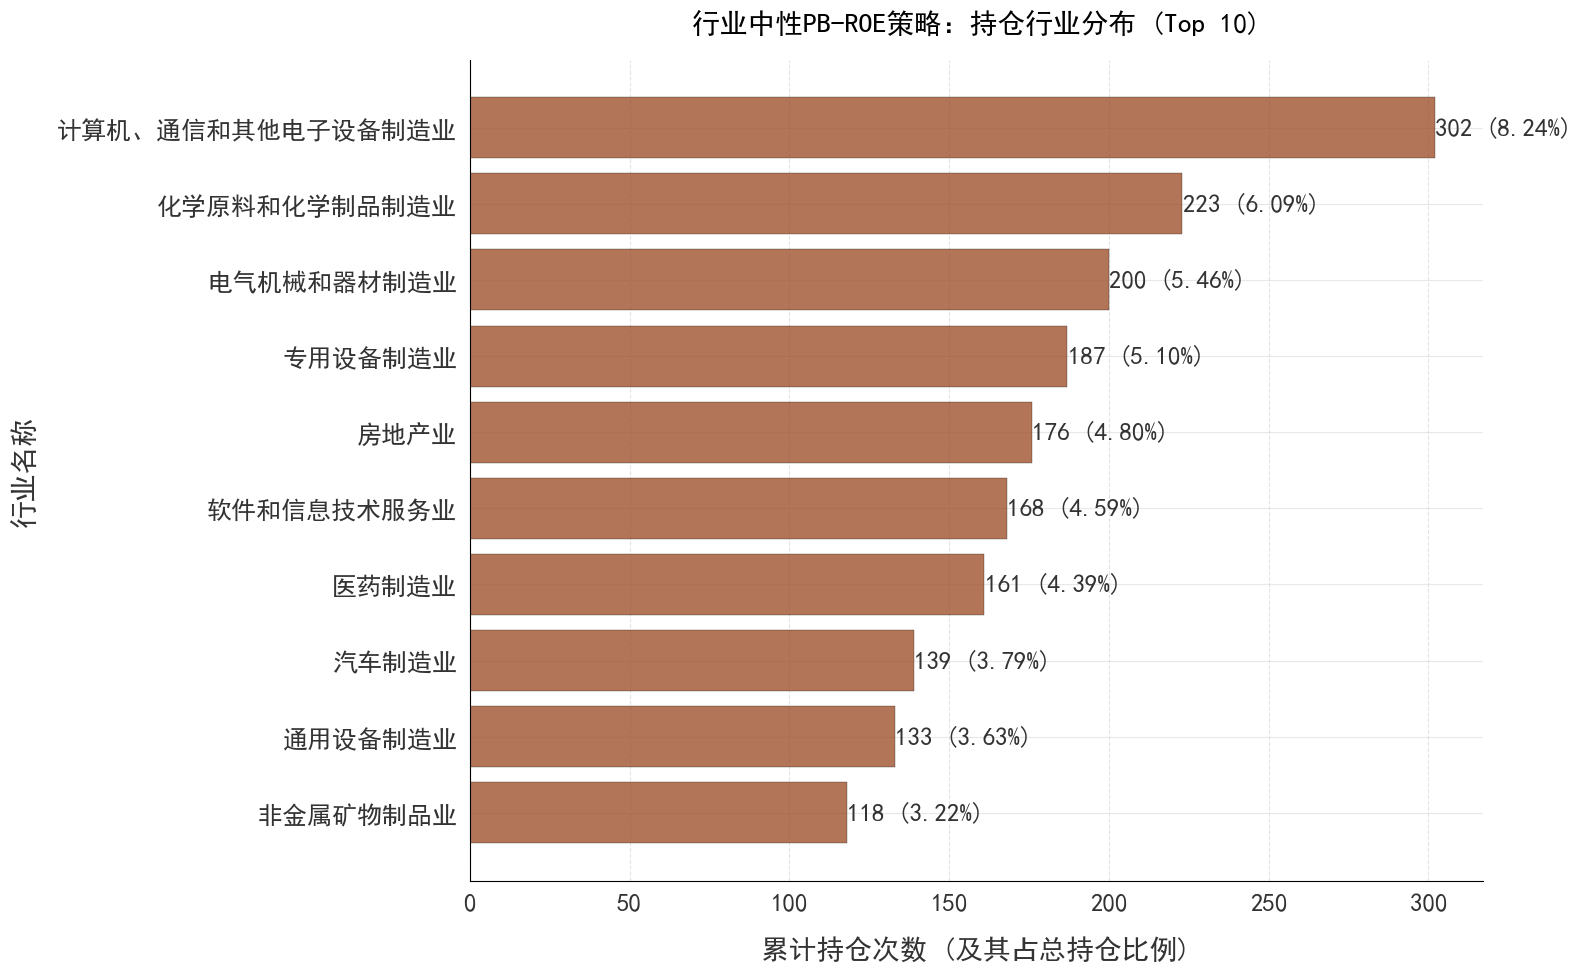

In [26]:
# 行业中性PB-ROE策略：行业分布绘图脚本
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- 1. 配置与样式 ---
plt.style.use('seaborn-v0_8-paper')
# industry_bar_color = get_academic_colors(6)[4] # 使用绿色系，与累计收益图中的颜色对应
industry_bar_color = get_academic_colors(36, 'categorical')[3]

# --- 2. 数据加载与处理 ---
# 直接读取行业中性策略的选股结果
portfolio_file = 'pbroe2.1.csv'
industry_column_name = 'indnme1'

try:
    # 加载数据
    df = pd.read_csv(portfolio_file)
    print(f"成功加载文件: '{portfolio_file}'")

    # 【新增】计算总持仓记录数，用于后续计算占比
    total_holdings = len(df)
    print(f"总持仓记录数为: {total_holdings}")

    # 统计所有持仓期间的行业分布，并选取数量最多的前10个行业
    industry_counts = df[industry_column_name].value_counts().head(10)

    # --- 3. 绘制行业分布图 ---
    print("\n正在绘制行业中性策略持仓排名前10的行业分布图...")

    fig, ax = plt.subplots(figsize=(16, 10))

    bars = ax.barh(
        industry_counts.index,
        industry_counts.values,
        color=industry_bar_color,
        edgecolor='k',
        alpha=0.8
    )

    ax.invert_yaxis()

    # 【修改】在标签中同时显示数量和占比
    for bar in bars:
        count = bar.get_width()
        # 计算百分比
        percentage = count / total_holdings
        # 创建新的组合标签
        label_text = f"{int(count)} ({percentage:.2%})"

        ax.text(
            count + 0.1,  # 标签位置微调
            bar.get_y() + bar.get_height() / 2.0,
            label_text, # 使用新的组合标签
            ha='left',      # 水平左对齐
            va='center',    # 垂直居中对齐
            fontsize=18,
            fontweight='bold'
        )

    # 【修改】更新图表标题和坐标轴标签
    ax.set_title('行业中性PB-ROE策略：持仓行业分布 (Top 10)', fontsize=20, fontweight='bold', pad=20)
    ax.set_xlabel('累计持仓次数 (及其占总持仓比例)', fontsize=20, labelpad=15)
    ax.set_ylabel('行业名称', fontsize=20, labelpad=15)

    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.spines[['top', 'right']].set_visible(False)

    plt.tight_layout()

    # --- 4. 保存图片 ---
    # 保存到第二章的图片目录
    output_dir = r'E:\PBROE\ch2\ch2_pics'
    # 更新文件名以反映新内容
    output_image_name = 'industry_neutral_portfolio_distribution_with_percentage.png'
    output_image_path = os.path.join(output_dir, output_image_name)

    os.makedirs(output_dir, exist_ok=True)
    plt.savefig(output_image_path, dpi=300, bbox_inches='tight')

    print(f"Top 10 行业分布图已成功保存至：{output_image_path}")
    plt.show()

except FileNotFoundError:
    print(f"\n错误：找不到文件 '{portfolio_file}'。请确保该文件与您的脚本在同一目录下，或提供正确的文件路径。")
except Exception as e:
    print(f"发生了未知错误: {e}")


In [11]:
# 行业中性化PB-ROE策略 (v4 - 交集法) 回测脚本
import pandas as pd
import numpy as np
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')

# =================================================================== #
#                           【1. 配置区域】                           #
# =================================================================== #

# --- 文件路径配置 ---
# 【修改】请将此路径设置为您的数据文件所在的目录
DATA_PATH = Path("E:/PBROE/data")
# 【已适配】策略文件已更新为 pbroe2.2 版本
STRATEGY_FILE = 'pbroe2.1.csv'
# 【注意】确保以下文件与您之前使用的文件一致
RETURNS_FILE = DATA_PATH / 'TRD_Mnth.csv'
BENCHMARK_FILE = DATA_PATH / 'benchmark_indices.csv'

# --- 回测参数配置 ---
BACKTEST_START_DATE = '2010-05-01' # 回测起始日期 (YYYY-MM-DD)
BACKTEST_END_DATE = '2025-04-30'   # 回测结束日期 (YYYY-MM-DD)
BENCHMARK_CODE = '000300'          # 业绩基准代码，沪深300
BENCHMARK_NAME = '沪深300'         # 基准名称，用于报告
RISK_FREE_RATE = 0.03              # 无风险利率，用于计算夏普比率

# =================================================================== #
#                  【2. 数据加载与预处理模块】                      #
# =================================================================== #

def load_and_preprocess_data(strategy_path, returns_path, benchmark_path, benchmark_code):
    """
    加载并预处理所有需要的数据文件。
    """
    print("--- 步骤 1: 加载并预处理数据 ---")
    try:
        strategy_df = pd.read_csv(strategy_path)
        try:
            returns_df = pd.read_csv(returns_path)
        except UnicodeDecodeError:
            returns_df = pd.read_csv(returns_path, encoding='gbk')
        all_benchmarks_df = pd.read_csv(benchmark_path)
        print("所有数据文件加载成功。")

    except FileNotFoundError as e:
        print(f"错误: 无法找到数据文件 {e.filename}。请检查【配置区域】中的文件路径。")
        return None, None, None

    if '调入日期' in strategy_df.columns:
        strategy_df.rename(columns={'调入日期': 'rebalance_date'}, inplace=True)
    strategy_df['rebalance_date'] = pd.to_datetime(strategy_df['rebalance_date'])
    strategy_df['stkcd'] = strategy_df['stkcd'].astype(str).str.zfill(6)
    returns_df['Stkcd'] = returns_df['Stkcd'].astype(str).str.zfill(6)
    returns_df['Trdmnt'] = pd.to_datetime(returns_df['Trdmnt'])
    returns_df['Mretwd'] = pd.to_numeric(returns_df['Mretwd'], errors='coerce')
    all_benchmarks_df['Indexcd'] = all_benchmarks_df['Indexcd'].astype(str).str.zfill(6)
    benchmark_df = all_benchmarks_df[all_benchmarks_df['Indexcd'] == benchmark_code].copy()
    if benchmark_df.empty:
        print(f"错误: 在基准文件 {benchmark_path.name} 中未能找到代码为 '{benchmark_code}' 的数据。")
        return None, None, None
    benchmark_df['date'] = pd.to_datetime(benchmark_df['Month'], format='%Y-%m')
    benchmark_df['merge_key'] = benchmark_df['date'].dt.strftime('%Y-%m')
    benchmark_df.rename(columns={'Idxrtn': 'benchmark_return'}, inplace=True)
    benchmark_df = benchmark_df[['merge_key', 'benchmark_return']]

    print("数据预处理完成。\n")
    return strategy_df, returns_df, benchmark_df

# =================================================================== #
#                       【3. 核心回测逻辑模块】                       #
# =================================================================== #

def run_backtest(strategy_df, returns_df, start_date_str, end_date_str):
    print("--- 步骤 2: 执行回测 ---")
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    strategy_df = strategy_df[(strategy_df['rebalance_date'] >= start_date) & (strategy_df['rebalance_date'] <= end_date)]
    if strategy_df.empty:
        print("错误：在指定的回测期间内，没有找到任何有效的调仓数据。")
        return pd.DataFrame()
    rebalance_dates = sorted(strategy_df['rebalance_date'].unique())
    print(f"回测期间内的调仓日期数量: {len(rebalance_dates)}")
    monthly_returns_list = []
    for i, current_rebalance_date in enumerate(rebalance_dates):
        if i + 1 < len(rebalance_dates):
            next_rebalance_date = rebalance_dates[i+1]
        else:
            next_rebalance_date = end_date + pd.DateOffset(days=1)
        current_portfolio = strategy_df[strategy_df['rebalance_date'] == current_rebalance_date]['stkcd'].tolist()
        period_months = sorted(returns_df[
            (returns_df['Trdmnt'] >= current_rebalance_date) &
            (returns_df['Trdmnt'] < next_rebalance_date)
        ]['Trdmnt'].unique())
        for month_end_date in period_months:
            month_returns_data = returns_df[
                (returns_df['Trdmnt'] == month_end_date) &
                (returns_df['Stkcd'].isin(current_portfolio))
            ]
            valid_returns = month_returns_data.dropna(subset=['Mretwd'])
            if not valid_returns.empty:
                portfolio_return = valid_returns['Mretwd'].mean()
                monthly_returns_list.append({
                    'date': month_end_date,
                    'portfolio_return': portfolio_return,
                    'valid_stocks': len(valid_returns),
                    'total_stocks': len(current_portfolio)
                })
    if not monthly_returns_list:
        print("错误：在指定的回测期间内，未能计算出任何月度收益率。")
        return pd.DataFrame()
    portfolio_returns_df = pd.DataFrame(monthly_returns_list).sort_values('date').reset_index(drop=True)
    print("回测循环完成，已生成投资组合月度收益率。\n")
    return portfolio_returns_df

# =================================================================== #
#                  【新增】4. 年化换手率计算模块                      #
# =================================================================== #

def calculate_annual_turnover(strategy_df, start_date_str, end_date_str):
    """
    计算策略的年化换手率。
    """
    print("--- 步骤 3: 计算年化换手率 ---")
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)

    # 筛选在回测区间内的调仓数据
    strategy_df = strategy_df[(strategy_df['rebalance_date'] >= start_date) & (strategy_df['rebalance_date'] <= end_date)]

    rebalance_dates = sorted(strategy_df['rebalance_date'].unique())
    if len(rebalance_dates) < 2:
        print("调仓次数少于2次，无法计算换手率。")
        return 0.0

    turnover_list = []
    # 从第二个调仓日开始循环
    for i in range(1, len(rebalance_dates)):
        # 获取上一个和当前的调仓日
        prev_date = rebalance_dates[i-1]
        curr_date = rebalance_dates[i]

        # 获取上期和本期的持仓列表（集合形式，方便计算差集）
        prev_portfolio = set(strategy_df[strategy_df['rebalance_date'] == prev_date]['stkcd'])
        curr_portfolio = set(strategy_df[strategy_df['rebalance_date'] == curr_date]['stkcd'])

        if not prev_portfolio:
            continue

        # 计算卖出的股票数量（在上期但不在本期的）
        stocks_sold = len(prev_portfolio - curr_portfolio)

        # 计算单期换手率
        period_turnover = stocks_sold / len(prev_portfolio)
        turnover_list.append(period_turnover)

    if not turnover_list:
        return 0.0

    # 计算平均单期换手率
    avg_period_turnover = np.mean(turnover_list)

    # 计算年均调仓次数
    total_years = (rebalance_dates[-1] - rebalance_dates[0]).days / 365.25
    rebalances_per_year = len(turnover_list) / total_years if total_years > 0 else 0

    # 计算年化换手率
    annual_turnover = avg_period_turnover * rebalances_per_year

    print(f"计算完成。平均单期换手率: {avg_period_turnover:.2%}, 年均调仓: {rebalances_per_year:.2f}次。")
    print(f"预估年化换手率: {annual_turnover:.2%}\n")

    return annual_turnover

# =================================================================== #
#                       【5. 绩效计算与保存模块】                     #
# =================================================================== #

def calculate_performance_and_save(portfolio_returns_df, benchmark_df, annual_turnover, benchmark_name):
    print("--- 步骤 4: 计算绩效并保存结果 ---")

    portfolio_returns_df['merge_key'] = portfolio_returns_df['date'].dt.strftime('%Y-%m')
    merged_df = pd.merge(portfolio_returns_df, benchmark_df, on='merge_key', how='left')
    merged_df['benchmark_return'].fillna(0.0, inplace=True)
    merged_df.drop(columns=['merge_key'], inplace=True)

    total_months = len(merged_df)
    if total_months == 0:
        print("无数据，无法计算绩效。")
        return None, None

    merged_df['cumulative_return'] = (1 + merged_df['portfolio_return']).cumprod()
    merged_df['cumulative_benchmark'] = (1 + merged_df['benchmark_return']).cumprod()
    merged_df['excess_return'] = merged_df['portfolio_return'] - merged_df['benchmark_return']

    final_cumulative_return = merged_df['cumulative_return'].iloc[-1]
    annualized_return = final_cumulative_return ** (12 / total_months) - 1
    annualized_volatility = merged_df['portfolio_return'].std() * np.sqrt(12)
    sharpe_ratio = (annualized_return - RISK_FREE_RATE) / annualized_volatility if annualized_volatility != 0 else 0
    rolling_max = merged_df['cumulative_return'].expanding().max()
    drawdown = (merged_df['cumulative_return'] - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    annualized_benchmark_return = (1 + merged_df['benchmark_return']).prod() ** (12 / total_months) - 1
    annualized_excess_return = annualized_return - annualized_benchmark_return
    tracking_error = merged_df['excess_return'].std() * np.sqrt(12)
    information_ratio = annualized_excess_return / tracking_error if tracking_error != 0 else 0

    metrics = {
        '年化收益率': annualized_return,
        '年化波动率': annualized_volatility,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        '年化换手率': annual_turnover,  # 【新增】
        '年化超额收益率': annualized_excess_return,
        '信息比率': information_ratio,
        '跟踪误差': tracking_error,
        '基准年化收益率': annualized_benchmark_return,
        '累计收益率': final_cumulative_return - 1,
    }

    print("\n--- PB-ROE 策略 (pbroe2.1 - 行业中心化) 绩效简报 ---")
    for key, value in metrics.items():
        print(f"{key+':':<12} {value:.2%}" if isinstance(value, float) and ('率' in key or '回撤' in key) else f"{key+':':<12} {value:.4f}")

    returns_filename = 'pbroe2.1_returns.csv'
    metrics_filename = 'pbroe2.1_performance.csv'
    merged_df.to_csv(returns_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"\n月度收益率详情已保存至: {returns_filename}")
    pd.DataFrame([metrics]).to_csv(metrics_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"绩效指标已保存至: {metrics_filename}\n")

    return merged_df, metrics

# =================================================================== #
#                          【6. 主函数执行】                          #
# =================================================================== #

def main():
    """
    主执行函数
    """
    try:
        strategy_df, returns_df, benchmark_df = load_and_preprocess_data(
            STRATEGY_FILE, RETURNS_FILE, BENCHMARK_FILE, BENCHMARK_CODE
        )
        if strategy_df is None: return

        portfolio_returns_df = run_backtest(
            strategy_df, returns_df, BACKTEST_START_DATE, BACKTEST_END_DATE
        )
        if portfolio_returns_df.empty: return

        # 【新增】调用换手率计算函数
        annual_turnover = calculate_annual_turnover(
            strategy_df, BACKTEST_START_DATE, BACKTEST_END_DATE
        )

        # 【修改】将换手率结果传入绩效计算函数
        final_df, metrics = calculate_performance_and_save(
            portfolio_returns_df, benchmark_df, annual_turnover, BENCHMARK_NAME
        )

        print("\n回测完成！")

    except Exception as e:
        print(f"\n执行过程中出现严重错误: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()


--- 步骤 1: 加载并预处理数据 ---
所有数据文件加载成功。
数据预处理完成。

--- 步骤 2: 执行回测 ---
回测期间内的调仓日期数量: 15
回测循环完成，已生成投资组合月度收益率。

--- 步骤 3: 计算年化换手率 ---
计算完成。平均单期换手率: 54.78%, 年均调仓: 1.00次。
预估年化换手率: 54.77%

--- 步骤 4: 计算绩效并保存结果 ---

--- PB-ROE 策略 (pbroe2.1 - 行业中心化) 绩效简报 ---
年化收益率:       8.05%
年化波动率:       24.76%
夏普比率:        20.40%
最大回撤:        -39.00%
年化换手率:       54.77%
年化超额收益率:     6.67%
信息比率:        53.07%
跟踪误差:        0.1256
基准年化收益率:     1.39%
累计收益率:       219.48%

月度收益率详情已保存至: pbroe2.1_returns.csv
绩效指标已保存至: pbroe2.1_performance.csv


回测完成！


--- 开始加载和合并数据 ---
成功加载原始策略文件: strategy_monthly_returns_vs_benchmark.csv
成功加载行业中性策略文件: strategy2.1_v4_monthly_returns.csv
数据加载和合并完成。

--- 正在绘制累计收益曲线 ---
累计收益对比图已保存至: ch2_pics\comparison_cumulative_returns.png



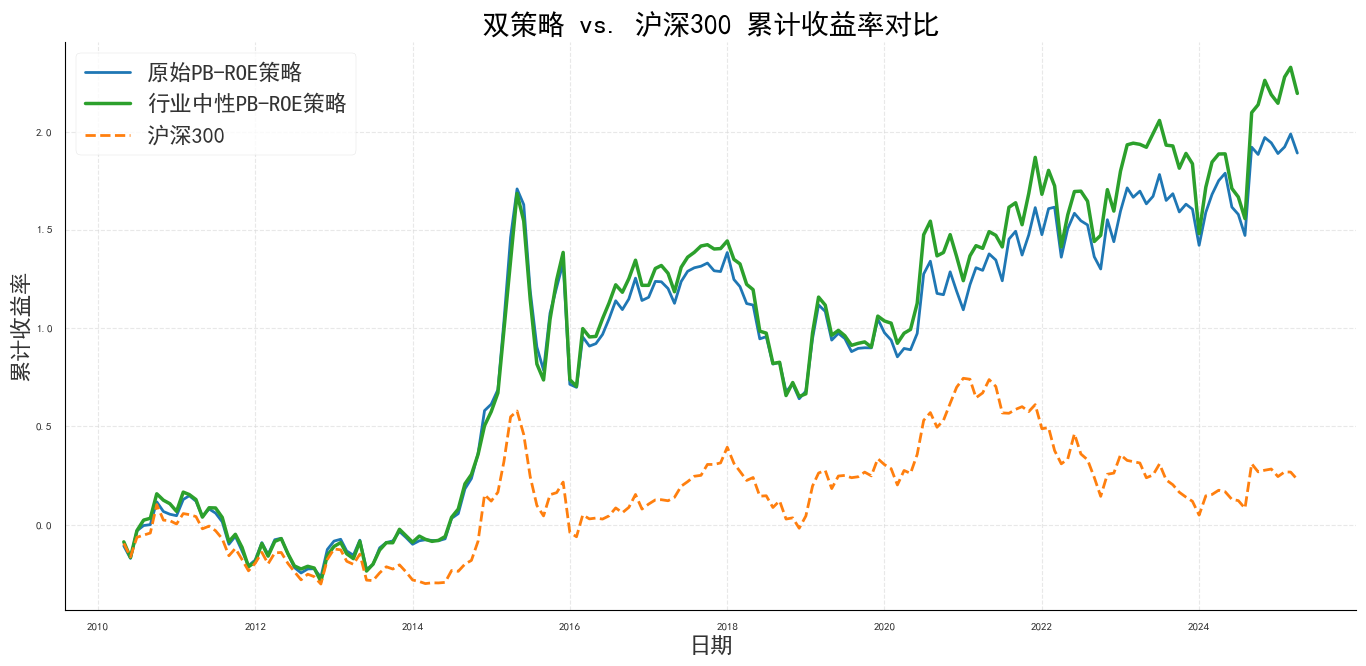

--- 正在绘制年度收益对比图 ---

--- 年度收益数据表 ---
      年份  原始策略年化收益  行业中性策略年化收益
0   2010  0.119396    0.127535
1   2011 -0.175402   -0.189046
2   2012 -0.085297   -0.095784
3   2013  0.088961    0.106302
4   2014  1.678467    1.562924
5   2015 -0.224985   -0.165963
6   2016  0.153534    0.165760
7   2017 -0.034745   -0.024768
8   2018 -0.018829   -0.047576
9   2019 -0.090405   -0.067566
10  2020  0.209525    0.218871
11  2021  0.029252    0.002993
12  2022  0.142424    0.216410
13  2023  0.019898   -0.016761
14  2024  0.050930    0.106858
年度收益对比图已保存至: ch2_pics\comparison_annual_returns.png



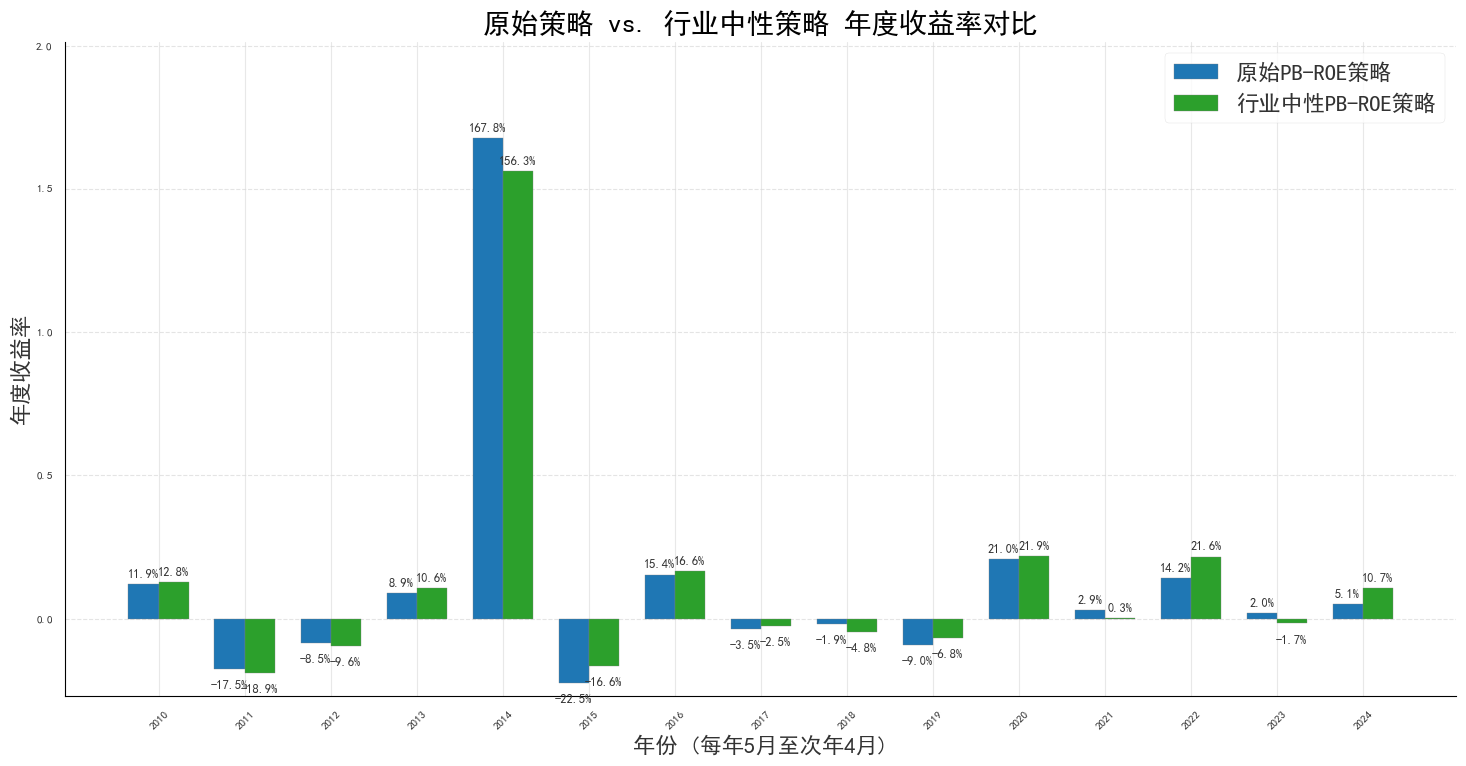

In [11]:
# 双策略对比分析脚本
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# --- 1. 配置区域 ---

# 【请修改】确保以下文件路径正确
# 原始PB-ROE策略的回测结果文件
FILE_ORIGINAL = Path(r'E:\PBROE\ch1\strategy_monthly_returns_vs_benchmark.csv')
# 行业中性策略的回测结果文件
FILE_INDUSTRY_NEUTRAL = Path(r'pbroe2.1_returns.csv') # 使用我们上一部生成的文件

# 创建一个新的目录来保存对比图片
output_dir = Path("./ch2_pics")
output_dir.mkdir(exist_ok=True)
set_academic_style()
# --- 配置绘图环境 ---
# 解决matplotlib中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei' 是黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题
plt.style.use('seaborn-v0_8-paper')
plt.rcParams['font.size'] = 18

def get_academic_colors(n, style='categorical'):
    """获取一个简单的颜色列表"""
    if style == 'categorical':
        # 蓝, 橙, 绿, 红, 紫, 棕
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
        return colors[:n]
    return None

# --- 2. 数据加载与合并 ---

def load_and_merge_strategies(file_orig, file_neutral):
    """加载两个策略的收益文件并合并"""
    print("--- 开始加载和合并数据 ---")
    try:
        # 加载原始策略数据 (ch1)
        df_orig = pd.read_csv(file_orig)
        # ch1文件列名为中文，需重命名
        df_orig.rename(columns={
            '月份': 'date',
            '组合月收益率': 'return_orig',
            '基准月收益率': 'benchmark_return',
        }, inplace=True)
        print(f"成功加载原始策略文件: {file_orig.name}")

        # 加载行业中性策略数据 (ch2)
        df_neutral = pd.read_csv(file_neutral)
        # ch2文件列名为英文，需重命名
        df_neutral.rename(columns={
            'portfolio_return': 'return_neutral'
        }, inplace=True)
        print(f"成功加载行业中性策略文件: {file_neutral.name}")

    except FileNotFoundError as e:
        print(f"错误: 无法找到文件 {e.filename}。请检查文件路径配置。")
        return None

    # 统一日期格式并设为索引
    df_orig['date'] = pd.to_datetime(df_orig['date'])
    df_neutral['date'] = pd.to_datetime(df_neutral['date'])

    # 使用外连接（outer join）合并两个策略的数据，确保所有日期都包含在内
    df_merged = pd.merge(
        df_orig[['date', 'return_orig', 'benchmark_return']],
        df_neutral[['date', 'return_neutral']],
        on='date',
        how='outer'
    ).sort_values('date').set_index('date')

    # 填充可能因合并产生的缺失值（例如，如果一个策略开始得更早）
    df_merged.fillna(0, inplace=True)

    print("数据加载和合并完成。\n")
    return df_merged

# 合并数据
df_compare = load_and_merge_strategies(FILE_ORIGINAL, FILE_INDUSTRY_NEUTRAL)

if df_compare is None:
    exit() # 如果数据加载失败，则退出

# --- 3. 绘制累计收益曲线 (三线对比) ---

def plot_cumulative_returns(df):
    """绘制两个策略与基准的累计收益曲线"""
    print("--- 正在绘制累计收益曲线 ---")
    # 计算三个系列的累计收益
    df['cum_ret_orig'] = (1 + df['return_orig']).cumprod() - 1
    df['cum_ret_neutral'] = (1 + df['return_neutral']).cumprod() - 1
    df['cum_ret_benchmark'] = (1 + df['benchmark_return']).cumprod() - 1

    # 获取颜色
    colors = get_academic_colors(3)

    plt.figure(figsize=(14, 7))

    plt.plot(df.index, df['cum_ret_orig'], label='原始PB-ROE策略', color=colors[0], linewidth=2)
    plt.plot(df.index, df['cum_ret_neutral'], label='行业中性PB-ROE策略', color=colors[2], linewidth=2.5) # 让新策略线稍粗
    plt.plot(df.index, df['cum_ret_benchmark'], label='沪深300', color=colors[1], linestyle='--', linewidth=2)

    plt.title('双策略 vs. 沪深300 累计收益率对比', fontsize=20)
    plt.xlabel('日期', fontsize=16)
    plt.ylabel('累计收益率', fontsize=16)
    plt.legend(fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    save_path = output_dir / 'comparison_cumulative_returns.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"累计收益对比图已保存至: {save_path}\n")
    plt.show()

plot_cumulative_returns(df_compare)


# --- 4. 绘制年度收益对比柱状图 (双策略对比) ---

def plot_annual_returns(df):
    """绘制两个策略的年度收益对比柱状图"""
    print("--- 正在绘制年度收益对比图 ---")
    # 确定策略年度
    df['策略年度'] = df.index.year - (df.index.month < 5)

    # 计算年度收益
    annual_returns = df.groupby('策略年度')[['return_orig', 'return_neutral']].apply(lambda x: (1 + x).prod() - 1).reset_index()
    annual_returns.rename(columns={
        'return_orig': '原始策略年化收益',
        'return_neutral': '行业中性策略年化收益',
        '策略年度': '年份'
    }, inplace=True)

    # 【新增】在绘图前显示年度收益数据表
    print("\n--- 年度收益数据表 ---")
    # 使用display函数，在Jupyter环境中会有更好的格式化输出
    print(annual_returns)


    plt.figure(figsize=(15, 8))

    bar_width = 0.35
    r1 = np.arange(len(annual_returns['年份']))
    r2 = [x + bar_width for x in r1]

    colors = get_academic_colors(5)

    bars1 = plt.bar(r1, annual_returns['原始策略年化收益'], color=colors[0], width=bar_width, edgecolor='grey', label='原始PB-ROE策略')
    bars2 = plt.bar(r2, annual_returns['行业中性策略年化收益'], color=colors[2], width=bar_width, edgecolor='grey', label='行业中性PB-ROE策略')

    plt.title('原始策略 vs. 行业中性策略 年度收益率对比', fontsize=20)
    plt.xlabel('年份 (每年5月至次年4月)', fontsize=16)
    plt.ylabel('年度收益率', fontsize=16)
    plt.xticks([r + bar_width/2 for r in range(len(annual_returns['年份']))], annual_returns['年份'], rotation=45)
    plt.legend(fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            va = 'bottom' if height >= 0 else 'top'
            offset = 3 if height >= 0 else -8
            plt.annotate(f'{height:.1%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, offset), textcoords="offset points", ha='center', va=va, fontsize=9)

    add_labels(bars1)
    add_labels(bars2)

    min_y = min(annual_returns['原始策略年化收益'].min(), annual_returns['行业中性策略年化收益'].min())
    max_y = max(annual_returns['原始策略年化收益'].max(), annual_returns['行业中性策略年化收益'].max())
    plt.ylim(min_y * 1.2, max_y * 1.2)
    plt.tight_layout()

    save_path = output_dir / 'comparison_annual_returns.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"年度收益对比图已保存至: {save_path}\n")
    plt.show()

plot_annual_returns(df_compare)


## 🧠 策略改进二：依据财报披露节奏优化调仓周期

在初始的 **PB-ROE 策略框架** 中，我们采用年度调仓模式：每年 **5 月初**，根据所有 A 股公司已披露的年报数据进行一次集中调仓。这种设计确保了数据的完整性与可比性，符合 **年报截止日为 4 月 30 日** 的信息披露规则。

---

### ⚠️ 年度调仓机制的局限

随着市场节奏加快，年度调仓在信息时效性方面存在两大缺陷：

1. **财务数据滞后性**
   使用 ROE 指标时，参考的是 **上一年度 12 月底** 的财务状况。到 5 月初时，这些数据已经落后近 **4 个月**，期间企业基本面可能已发生明显变化。

2. **边际业绩变化响应不足**
   事实上，大部分公司第一季度报告已在 4 月底前披露，其中包含了最新业绩信息。若仍依赖年报数据，意味着无法响应公司潜在业绩“爆雷”或改善的信号。

---

### 🔄 改进逻辑：季度动态调仓机制

为提升信息响应速度，我们提出策略改进方案 —— **调仓节奏与 A 股财报披露周期同步**，改为每季度调仓一次：

| 调仓时间 | 财报依据       | 披露截止日 |
|----------|----------------|------------|
| 5 月初   | 一季度报告     | 4 月 30 日 |
| 9 月初   | 半年度报告     | 8 月 31 日 |
| 11 月初  | 三季度报告     | 10 月 31 日 |

每次调仓在披露截止日后的 **首个交易日** 进行，再平衡投资组合。

---

### 🌟 改进优势

- **信息效率提升**
  更快捕捉盈利能力变化，及时买入改善企业、剔除风险标的。

- **增强策略适应性与前瞻性**
  使 PB-ROE 框架从静态回顾变为动态响应，更贴近市场变化。

---

> 这一逻辑优化，让我们的投资决策链条——从数据获取、因子计算到组合构建——更为紧凑及时。接下来的章节将以回测数据验证该机制的实际有效性。



In [3]:
# 选股：季度调仓的行业中性PB-ROE策略
import pandas as pd
import numpy as np
from datetime import datetime

print("--- 1. 数据准备与清洗 ---")

# 复制数据，避免修改原始DataFrame
df = dfpbroech2.copy()

# 重命名列
df.rename(columns={
    'f050504c': 'ROEttm',
    'f100401a': 'PB',
    'msmvosd': '流通市值',
    'msmvttl': '总市值'
}, inplace=True)

# 转换日期格式
df['accper'] = pd.to_datetime(df['accper'])

# 数据清洗
# 1. 剔除ST,*ST股票
df = df[df['ifst'] == 0]

# 2. 剔除关键指标为空的记录
df.dropna(subset=['ROEttm', 'PB', 'indnme1'], inplace=True)

# 3. 剔除不符合条件的样本（PB为负或ROE过高）
# ROE < 0.5 是为了剔除一些极端异常值
df = df[(df['ROEttm'] < 0.5) & (df['PB'] > 0)]

print(f"数据清洗后，剩余 {len(df)} 条记录。")


print("\n--- 2. 生成调仓计划 ---")
rebalancing_periods = []
for year in range(2010, 2026):
    # 5月初调仓，使用上一年的年报 (12-31)
    rebalancing_periods.append({
        "调入日期": pd.to_datetime(f'{year}-05-01'),
        "accper": pd.to_datetime(f'{year-1}-12-31')
    })
    # 9月初调仓，使用当年的半年报 (06-30)
    rebalancing_periods.append({
        "调入日期": pd.to_datetime(f'{year}-09-01'),
        "accper": pd.to_datetime(f'{year}-06-30')
    })
    # 11月初调仓，使用当年的三季报 (09-30)
    rebalancing_periods.append({
        "调入日期": pd.to_datetime(f'{year}-11-01'),
        "accper": pd.to_datetime(f'{year}-09-30')
    })

# 筛选掉超出数据范围的调仓日期
max_accper_date = df['accper'].max()
rebalancing_periods = [p for p in rebalancing_periods if p['accper'] <= max_accper_date]

print(f"共生成 {len(rebalancing_periods)} 个调仓期。")


print("\n--- 3. 执行策略回测与选股 ---")
all_portfolios = []

# 定义筛选分位数
ROE_QUANTILE = 0.33  # ROE筛选分位数，选择前33%
PB_QUANTILE = 0.33   # PB筛选分位数，选择后33%

for period in rebalancing_periods:
    rebal_date = period['调入日期']
    accper_date = period['accper']

    # 筛选出当前财报期的数据
    current_data = df[df['accper'] == accper_date].copy()

    if current_data.empty:
        print(f"在 {rebal_date.date()} (财报期: {accper_date.date()}) 无可用数据，跳过。")
        continue

    # --- 新的选股逻辑：独立筛选后取交集 ---
    selected_stocks_list = []
    for name, group in current_data.groupby('indnme1'):
        # 行业内样本数过少则跳过，无法计算有效分位数
        if len(group) < 3:
            continue

        # 1. 独立筛选出ROE排名前 roe_q 的股票 (Set A)
        roe_threshold = group['ROEttm'].quantile(1 - ROE_QUANTILE)
        high_roe_stocks = group[group['ROEttm'] >= roe_threshold]

        # 2. 独立筛选出PB排名后 pb_q 的股票 (Set B)
        pb_threshold = group['PB'].quantile(PB_QUANTILE)
        low_pb_stocks = group[group['PB'] <= pb_threshold]

        # 3. 返回 Set A 和 Set B 的交集
        high_roe_indices = high_roe_stocks.index
        low_pb_indices = low_pb_stocks.index
        intersected_indices = high_roe_indices.intersection(low_pb_indices)

        if not intersected_indices.empty:
            selected_stocks_list.append(group.loc[intersected_indices])

    if not selected_stocks_list:
        print(f"在 {rebal_date.date()} (财报期: {accper_date.date()}) 未选出任何股票，跳过。")
        continue

    period_portfolio = pd.concat(selected_stocks_list)
    period_portfolio['调入日期'] = rebal_date

    all_portfolios.append(period_portfolio)
    print(f"在 {rebal_date.date()} (财报期: {accper_date.date()}) 选出 {len(period_portfolio)} 只股票。")


print("\n--- 4. 生成并保存最终投资组合文件 ---")
if all_portfolios:
    final_portfolio = pd.concat(all_portfolios)

    # 整理输出列
    output_columns = [
        '调入日期', 'accper', 'stkcd', 'shortname', 'indnme1',
        'ROEttm', 'PB', '流通市值', '总市值'
    ]
    final_portfolio = final_portfolio[output_columns]

    # 格式化日期和数值
    final_portfolio['调入日期'] = final_portfolio['调入日期'].dt.date
    final_portfolio['accper'] = final_portfolio['accper'].dt.date
    final_portfolio['ROEttm'] = final_portfolio['ROEttm'].round(6)
    final_portfolio['PB'] = final_portfolio['PB'].round(6)
    final_portfolio['流通市值'] = final_portfolio['流通市值'].round(2)
    final_portfolio['总市值'] = final_portfolio['总市值'].round(2)


    # 保存到CSV文件
    output_filename = 'pbroe2.2.csv'
    final_portfolio.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\n投资组合已成功生成并保存为 '{output_filename}'。")
    print("文件预览（前5行）:")
    print(final_portfolio.head())
else:
    print("\n未能选出任何股票，无法生成组合文件。")


--- 1. 数据准备与清洗 ---
数据清洗后，剩余 236870 条记录。

--- 2. 生成调仓计划 ---
共生成 46 个调仓期。

--- 3. 执行策略回测与选股 ---
在 2010-05-01 (财报期: 2009-12-31) 选出 103 只股票。
在 2010-09-01 (财报期: 2010-06-30) 选出 119 只股票。
在 2010-11-01 (财报期: 2010-09-30) 选出 114 只股票。
在 2011-05-01 (财报期: 2010-12-31) 选出 126 只股票。
在 2011-09-01 (财报期: 2011-06-30) 选出 123 只股票。
在 2011-11-01 (财报期: 2011-09-30) 选出 143 只股票。
在 2012-05-01 (财报期: 2011-12-31) 选出 142 只股票。
在 2012-09-01 (财报期: 2012-06-30) 选出 135 只股票。
在 2012-11-01 (财报期: 2012-09-30) 选出 128 只股票。
在 2013-05-01 (财报期: 2012-12-31) 选出 117 只股票。
在 2013-09-01 (财报期: 2013-06-30) 选出 140 只股票。
在 2013-11-01 (财报期: 2013-09-30) 选出 160 只股票。
在 2014-05-01 (财报期: 2013-12-31) 选出 162 只股票。
在 2014-09-01 (财报期: 2014-06-30) 选出 186 只股票。
在 2014-11-01 (财报期: 2014-09-30) 选出 199 只股票。
在 2015-05-01 (财报期: 2014-12-31) 选出 187 只股票。
在 2015-09-01 (财报期: 2015-06-30) 选出 200 只股票。
在 2015-11-01 (财报期: 2015-09-30) 选出 171 只股票。
在 2016-05-01 (财报期: 2015-12-31) 选出 222 只股票。
在 2016-09-01 (财报期: 2016-06-30) 选出 209 只股票。
在 2016-11-01 (财报期: 2016-09-30) 选出 218 只股票。
在 2

In [13]:
# 季度调仓的行业中性PB-ROE策略回测
import pandas as pd
import numpy as np
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')

# =================================================================== #
#                           【1. 配置区域】                           #
# =================================================================== #

# --- 文件路径配置 ---
# 【修改】请将此路径设置为您的数据文件所在的目录
DATA_PATH = Path("E:/PBROE/data")
# 【已适配】策略文件已更新为 pbroe2.2 版本
STRATEGY_FILE = 'pbroe2.2.csv'
# 【注意】确保以下文件与您之前使用的文件一致
RETURNS_FILE = DATA_PATH / 'TRDNEW_Mnth.csv'
BENCHMARK_FILE = DATA_PATH / 'benchmark_indices.csv'

# --- 回测参数配置 ---
BACKTEST_START_DATE = '2010-05-01' # 回测起始日期 (YYYY-MM-DD)
BACKTEST_END_DATE = '2025-04-30'   # 回测结束日期 (YYYY-MM-DD)
BENCHMARK_CODE = '000300'          # 业绩基准代码，沪深300
BENCHMARK_NAME = '沪深300'         # 基准名称，用于报告
RISK_FREE_RATE = 0.03              # 无风险利率，用于计算夏普比率

# =================================================================== #
#                  【2. 数据加载与预处理模块】                      #
# =================================================================== #

def load_and_preprocess_data(strategy_path, returns_path, benchmark_path, benchmark_code):
    """
    加载并预处理所有需要的数据文件。
    """
    print("--- 步骤 1: 加载并预处理数据 ---")
    try:
        strategy_df = pd.read_csv(strategy_path)
        try:
            returns_df = pd.read_csv(returns_path)
        except UnicodeDecodeError:
            returns_df = pd.read_csv(returns_path, encoding='gbk')
        all_benchmarks_df = pd.read_csv(benchmark_path)
        print("所有数据文件加载成功。")

    except FileNotFoundError as e:
        print(f"错误: 无法找到数据文件 {e.filename}。请检查【配置区域】中的文件路径。")
        return None, None, None

    if '调入日期' in strategy_df.columns:
        strategy_df.rename(columns={'调入日期': 'rebalance_date'}, inplace=True)
    strategy_df['rebalance_date'] = pd.to_datetime(strategy_df['rebalance_date'])
    strategy_df['stkcd'] = strategy_df['stkcd'].astype(str).str.zfill(6)
    returns_df['Stkcd'] = returns_df['Stkcd'].astype(str).str.zfill(6)
    returns_df['Trdmnt'] = pd.to_datetime(returns_df['Trdmnt'])
    returns_df['Mretwd'] = pd.to_numeric(returns_df['Mretwd'], errors='coerce')
    all_benchmarks_df['Indexcd'] = all_benchmarks_df['Indexcd'].astype(str).str.zfill(6)
    benchmark_df = all_benchmarks_df[all_benchmarks_df['Indexcd'] == benchmark_code].copy()
    if benchmark_df.empty:
        print(f"错误: 在基准文件 {benchmark_path.name} 中未能找到代码为 '{benchmark_code}' 的数据。")
        return None, None, None
    benchmark_df['date'] = pd.to_datetime(benchmark_df['Month'], format='%Y-%m')
    benchmark_df['merge_key'] = benchmark_df['date'].dt.strftime('%Y-%m')
    benchmark_df.rename(columns={'Idxrtn': 'benchmark_return'}, inplace=True)
    benchmark_df = benchmark_df[['merge_key', 'benchmark_return']]

    print("数据预处理完成。\n")
    return strategy_df, returns_df, benchmark_df

# =================================================================== #
#                       【3. 核心回测逻辑模块】                       #
# =================================================================== #

def run_backtest(strategy_df, returns_df, start_date_str, end_date_str):
    print("--- 步骤 2: 执行回测 ---")
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    strategy_df = strategy_df[(strategy_df['rebalance_date'] >= start_date) & (strategy_df['rebalance_date'] <= end_date)]
    if strategy_df.empty:
        print("错误：在指定的回测期间内，没有找到任何有效的调仓数据。")
        return pd.DataFrame()
    rebalance_dates = sorted(strategy_df['rebalance_date'].unique())
    print(f"回测期间内的调仓日期数量: {len(rebalance_dates)}")
    monthly_returns_list = []
    for i, current_rebalance_date in enumerate(rebalance_dates):
        if i + 1 < len(rebalance_dates):
            next_rebalance_date = rebalance_dates[i+1]
        else:
            next_rebalance_date = end_date + pd.DateOffset(days=1)
        current_portfolio = strategy_df[strategy_df['rebalance_date'] == current_rebalance_date]['stkcd'].tolist()
        period_months = sorted(returns_df[
            (returns_df['Trdmnt'] >= current_rebalance_date) &
            (returns_df['Trdmnt'] < next_rebalance_date)
        ]['Trdmnt'].unique())
        for month_end_date in period_months:
            month_returns_data = returns_df[
                (returns_df['Trdmnt'] == month_end_date) &
                (returns_df['Stkcd'].isin(current_portfolio))
            ]
            valid_returns = month_returns_data.dropna(subset=['Mretwd'])
            if not valid_returns.empty:
                portfolio_return = valid_returns['Mretwd'].mean()
                monthly_returns_list.append({
                    'date': month_end_date,
                    'portfolio_return': portfolio_return,
                    'valid_stocks': len(valid_returns),
                    'total_stocks': len(current_portfolio)
                })
    if not monthly_returns_list:
        print("错误：在指定的回测期间内，未能计算出任何月度收益率。")
        return pd.DataFrame()
    portfolio_returns_df = pd.DataFrame(monthly_returns_list).sort_values('date').reset_index(drop=True)
    print("回测循环完成，已生成投资组合月度收益率。\n")
    return portfolio_returns_df

# =================================================================== #
#                  【新增】4. 年化换手率计算模块                      #
# =================================================================== #

def calculate_annual_turnover(strategy_df, start_date_str, end_date_str):
    """
    计算策略的年化换手率。
    """
    print("--- 步骤 3: 计算年化换手率 ---")
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)

    # 筛选在回测区间内的调仓数据
    strategy_df = strategy_df[(strategy_df['rebalance_date'] >= start_date) & (strategy_df['rebalance_date'] <= end_date)]

    rebalance_dates = sorted(strategy_df['rebalance_date'].unique())
    if len(rebalance_dates) < 2:
        print("调仓次数少于2次，无法计算换手率。")
        return 0.0

    turnover_list = []
    # 从第二个调仓日开始循环
    for i in range(1, len(rebalance_dates)):
        # 获取上一个和当前的调仓日
        prev_date = rebalance_dates[i-1]
        curr_date = rebalance_dates[i]

        # 获取上期和本期的持仓列表（集合形式，方便计算差集）
        prev_portfolio = set(strategy_df[strategy_df['rebalance_date'] == prev_date]['stkcd'])
        curr_portfolio = set(strategy_df[strategy_df['rebalance_date'] == curr_date]['stkcd'])

        if not prev_portfolio:
            continue

        # 计算卖出的股票数量（在上期但不在本期的）
        stocks_sold = len(prev_portfolio - curr_portfolio)

        # 计算单期换手率
        period_turnover = stocks_sold / len(prev_portfolio)
        turnover_list.append(period_turnover)

    if not turnover_list:
        return 0.0

    # 计算平均单期换手率
    avg_period_turnover = np.mean(turnover_list)

    # 计算年均调仓次数
    total_years = (rebalance_dates[-1] - rebalance_dates[0]).days / 365.25
    rebalances_per_year = len(turnover_list) / total_years if total_years > 0 else 0

    # 计算年化换手率
    annual_turnover = avg_period_turnover * rebalances_per_year

    print(f"计算完成。平均单期换手率: {avg_period_turnover:.2%}, 年均调仓: {rebalances_per_year:.2f}次。")
    print(f"预估年化换手率: {annual_turnover:.2%}\n")

    return annual_turnover

# =================================================================== #
#                       【5. 绩效计算与保存模块】                     #
# =================================================================== #

def calculate_performance_and_save(portfolio_returns_df, benchmark_df, annual_turnover, benchmark_name):
    print("--- 步骤 4: 计算绩效并保存结果 ---")

    portfolio_returns_df['merge_key'] = portfolio_returns_df['date'].dt.strftime('%Y-%m')
    merged_df = pd.merge(portfolio_returns_df, benchmark_df, on='merge_key', how='left')
    merged_df['benchmark_return'].fillna(0.0, inplace=True)
    merged_df.drop(columns=['merge_key'], inplace=True)

    total_months = len(merged_df)
    if total_months == 0:
        print("无数据，无法计算绩效。")
        return None, None

    merged_df['cumulative_return'] = (1 + merged_df['portfolio_return']).cumprod()
    merged_df['cumulative_benchmark'] = (1 + merged_df['benchmark_return']).cumprod()
    merged_df['excess_return'] = merged_df['portfolio_return'] - merged_df['benchmark_return']

    final_cumulative_return = merged_df['cumulative_return'].iloc[-1]
    annualized_return = final_cumulative_return ** (12 / total_months) - 1
    annualized_volatility = merged_df['portfolio_return'].std() * np.sqrt(12)
    sharpe_ratio = (annualized_return - RISK_FREE_RATE) / annualized_volatility if annualized_volatility != 0 else 0
    rolling_max = merged_df['cumulative_return'].expanding().max()
    drawdown = (merged_df['cumulative_return'] - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    annualized_benchmark_return = (1 + merged_df['benchmark_return']).prod() ** (12 / total_months) - 1
    annualized_excess_return = annualized_return - annualized_benchmark_return
    tracking_error = merged_df['excess_return'].std() * np.sqrt(12)
    information_ratio = annualized_excess_return / tracking_error if tracking_error != 0 else 0

    metrics = {
        '年化收益率': annualized_return,
        '年化波动率': annualized_volatility,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        '年化换手率': annual_turnover,  # 【新增】
        '年化超额收益率': annualized_excess_return,
        '信息比率': information_ratio,
        '跟踪误差': tracking_error,
        '基准年化收益率': annualized_benchmark_return,
        '累计收益率': final_cumulative_return - 1,
    }

    print("\n--- PB-ROE 策略 (pbroe2.2 - 季度调仓 & 交集法) 绩效简报 ---")
    for key, value in metrics.items():
        print(f"{key+':':<12} {value:.2%}" if isinstance(value, float) and ('率' in key or '回撤' in key) else f"{key+':':<12} {value:.4f}")

    returns_filename = 'pbroe2.2_returns.csv'
    metrics_filename = 'pbroe2.2_performance.csv'
    merged_df.to_csv(returns_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"\n月度收益率详情已保存至: {returns_filename}")
    pd.DataFrame([metrics]).to_csv(metrics_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"绩效指标已保存至: {metrics_filename}\n")

    return merged_df, metrics

# =================================================================== #
#                          【6. 主函数执行】                          #
# =================================================================== #

def main():
    """
    主执行函数
    """
    try:
        strategy_df, returns_df, benchmark_df = load_and_preprocess_data(
            STRATEGY_FILE, RETURNS_FILE, BENCHMARK_FILE, BENCHMARK_CODE
        )
        if strategy_df is None: return

        portfolio_returns_df = run_backtest(
            strategy_df, returns_df, BACKTEST_START_DATE, BACKTEST_END_DATE
        )
        if portfolio_returns_df.empty: return

        # 【新增】调用换手率计算函数
        annual_turnover = calculate_annual_turnover(
            strategy_df, BACKTEST_START_DATE, BACKTEST_END_DATE
        )

        # 【修改】将换手率结果传入绩效计算函数
        final_df, metrics = calculate_performance_and_save(
            portfolio_returns_df, benchmark_df, annual_turnover, BENCHMARK_NAME
        )

        print("\n回测完成！")

    except Exception as e:
        print(f"\n执行过程中出现严重错误: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()


--- 步骤 1: 加载并预处理数据 ---
所有数据文件加载成功。
数据预处理完成。

--- 步骤 2: 执行回测 ---
回测期间内的调仓日期数量: 45
回测循环完成，已生成投资组合月度收益率。

--- 步骤 3: 计算年化换手率 ---
计算完成。平均单期换手率: 36.09%, 年均调仓: 3.03次。
预估年化换手率: 109.48%

--- 步骤 4: 计算绩效并保存结果 ---

--- PB-ROE 策略 (pbroe2.2 - 季度调仓 & 交集法) 绩效简报 ---
年化收益率:       8.88%
年化波动率:       23.93%
夏普比率:        24.55%
最大回撤:        -40.11%
年化换手率:       109.48%
年化超额收益率:     7.49%
信息比率:        60.59%
跟踪误差:        0.1236
基准年化收益率:     1.39%
累计收益率:       258.05%

月度收益率详情已保存至: pbroe2.2_returns.csv
绩效指标已保存至: pbroe2.2_performance.csv


回测完成！


--- 开始加载和合并数据 ---
成功加载基础行业中性策略文件: pbroe2.1_returns.csv
成功加载季度调仓策略文件: pbroe2.2_returns.csv
数据加载和合并完成。

--- 正在绘制累计收益曲线 ---
累计收益对比图已保存至: ch2_pics\2.2comparison_quarterly_vs_base_neutral_cumulative.png



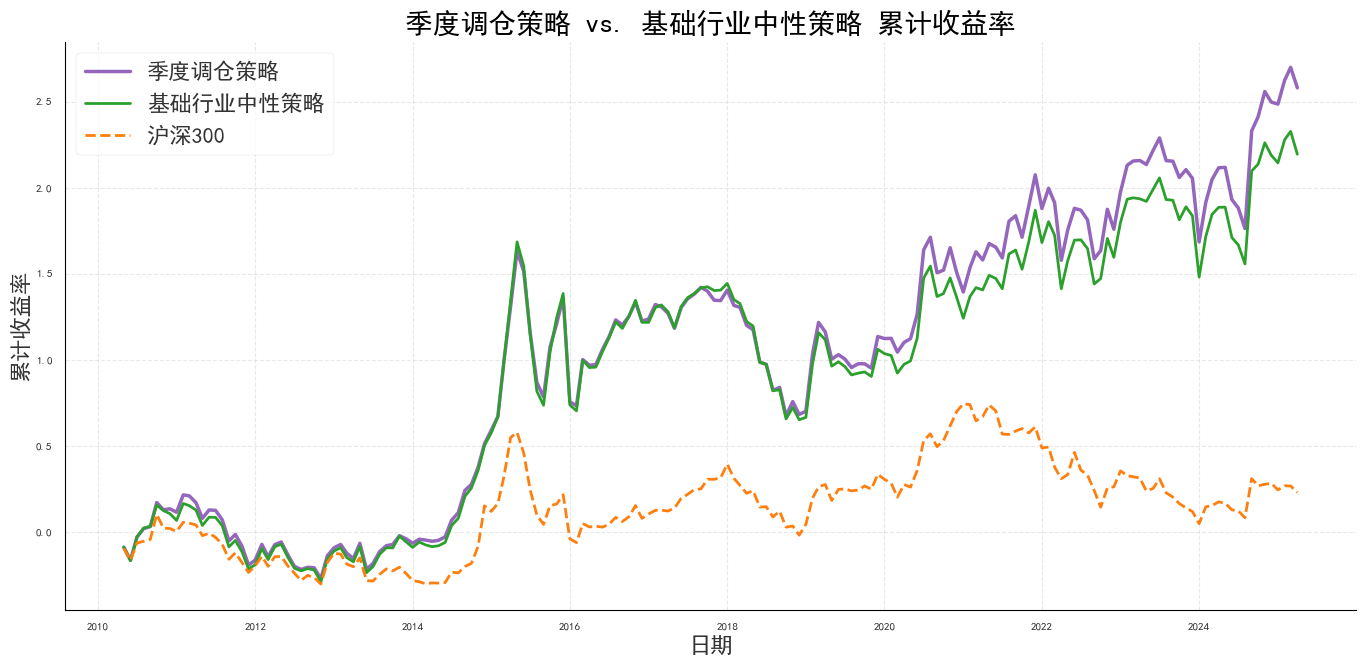

--- 正在绘制年度收益对比图 ---

--- 年度收益数据表 ---
      年份    季度调仓策略  基础行业中性策略
0   2010  0.170213  0.127535
1   2011 -0.208330 -0.189046
2   2012 -0.087564 -0.095784
3   2013  0.118957  0.106302
4   2014  1.442261  1.562924
5   2015 -0.147815 -0.165963
6   2016  0.153261  0.165760
7   2017 -0.031001 -0.024768
8   2018 -0.017021 -0.047576
9   2019 -0.028370 -0.067566
10  2020  0.228082  0.218871
11  2021 -0.000713  0.002993
12  2022  0.224834  0.216410
13  2023 -0.013281 -0.016761
14  2024  0.148973  0.106858
年度收益对比图已保存至: ch2_pics\2.2comparison_quarterly_vs_base_neutral_annual.png



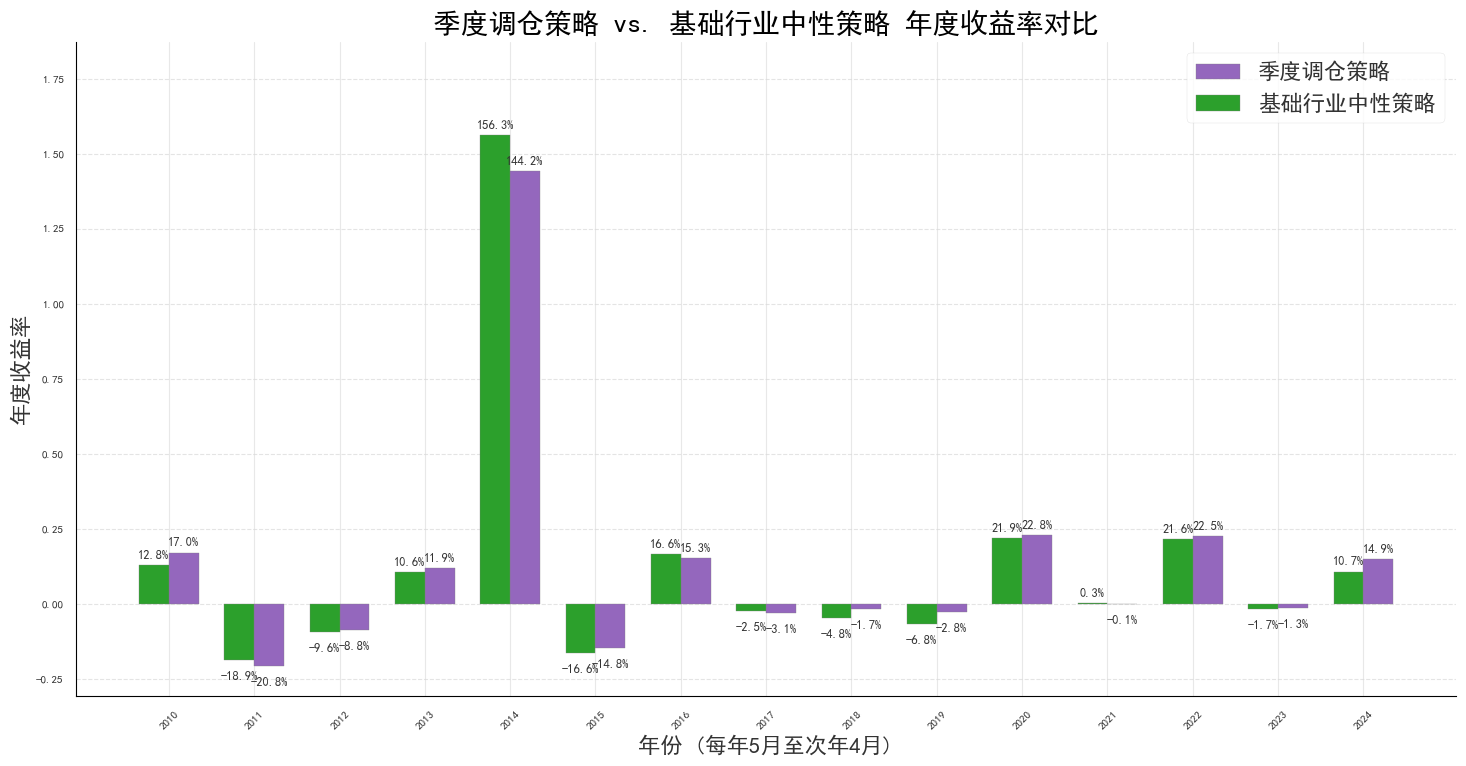

In [14]:
# 2.2双策略对比
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# --- 1. 配置区域 ---

# 【请修改】确保以下文件路径正确
# 基础行业中性策略的回测结果文件 (年报调仓)
# 注意：这里需要您提供之前回测生成的基础行业中性策略的收益文件
FILE_BASE_INDUSTRY_NEUTRAL = Path(r'pbroe2.1_returns.csv')

# 季度调仓策略的回测结果文件
FILE_QUARTERLY_REBALANCE = Path(r'pbroe2.2_returns.csv')

# 创建图片输出目录
output_dir = Path("./ch2_pics")
output_dir.mkdir(exist_ok=True)

set_academic_style()
# --- 配置绘图环境 ---
# 解决matplotlib中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-paper')
plt.rcParams['font.size'] = 18

def get_academic_colors(n, style='categorical'):
    """获取一个简单的颜色列表"""
    if style == 'categorical':
        # 蓝, 橙, 绿, 红, 紫, 棕
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
        return colors[:n]
    return None

# --- 2. 数据加载与合并 ---

def load_and_merge_strategies(file_base_neutral, file_quarterly):
    """加载两个策略的收益文件并合并"""
    print("--- 开始加载和合并数据 ---")
    try:
        # 加载基础行业中性策略数据
        df_base_neutral = pd.read_csv(file_base_neutral)
        # 假设其收益列名为 'portfolio_return'，如果不是请在此处修改
        df_base_neutral.rename(columns={
            'portfolio_return': 'return_base_neutral',
            'benchmark_return': 'benchmark_return' # 基准收益也从此文件获取
        }, inplace=True)
        print(f"成功加载基础行业中性策略文件: {file_base_neutral.name}")

        # 加载季度调仓策略数据
        df_quarterly = pd.read_csv(file_quarterly)
        df_quarterly.rename(columns={
            'portfolio_return': 'return_quarterly'
        }, inplace=True)
        print(f"成功加载季度调仓策略文件: {file_quarterly.name}")

    except FileNotFoundError as e:
        print(f"错误: 无法找到文件 {e.filename}。请检查文件路径配置。")
        return None

    # 统一日期格式
    df_base_neutral['date'] = pd.to_datetime(df_base_neutral['date'])
    df_quarterly['date'] = pd.to_datetime(df_quarterly['date'])

    # 使用外连接合并，确保所有日期都包含
    df_merged = pd.merge(
        df_base_neutral[['date', 'return_base_neutral', 'benchmark_return']],
        df_quarterly[['date', 'return_quarterly']],
        on='date',
        how='outer'
    ).sort_values('date').set_index('date')

    # 填充可能因合并产生的缺失值
    df_merged.fillna(0, inplace=True)

    print("数据加载和合并完成。\n")
    return df_merged

# 合并数据
df_compare = load_and_merge_strategies(FILE_BASE_INDUSTRY_NEUTRAL, FILE_QUARTERLY_REBALANCE)

if df_compare is None:
    exit() # 如果数据加载失败，则退出

# --- 3. 绘制累计收益曲线 (三线对比) ---

def plot_cumulative_returns(df):
    """绘制两个策略与基准的累计收益曲线"""
    print("--- 正在绘制累计收益曲线 ---")
    # 计算三个系列的累计收益
    df['cum_ret_quarterly'] = (1 + df['return_quarterly']).cumprod() - 1
    df['cum_ret_base_neutral'] = (1 + df['return_base_neutral']).cumprod() - 1
    df['cum_ret_benchmark'] = (1 + df['benchmark_return']).cumprod() - 1

    colors = get_academic_colors(5)

    plt.figure(figsize=(14, 7))

    # 绘制曲线
    plt.plot(df.index, df['cum_ret_quarterly'], label='季度调仓策略', color=colors[4], linewidth=2.5) # 蓝色，稍粗
    plt.plot(df.index, df['cum_ret_base_neutral'], label='基础行业中性策略', color=colors[2], linewidth=2) # 绿色
    plt.plot(df.index, df['cum_ret_benchmark'], label='沪深300', color=colors[1], linestyle='--', linewidth=2) # 橙色虚线

    plt.title('季度调仓策略 vs. 基础行业中性策略 累计收益率', fontsize=20)
    plt.xlabel('日期', fontsize=16)
    plt.ylabel('累计收益率', fontsize=16)
    plt.legend(fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    save_path = output_dir / '2.2comparison_quarterly_vs_base_neutral_cumulative.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"累计收益对比图已保存至: {save_path}\n")
    plt.show()

plot_cumulative_returns(df_compare)


# --- 4. 绘制年度收益对比柱状图 ---

def plot_annual_returns(df):
    """绘制两个策略的年度收益对比柱状图"""
    print("--- 正在绘制年度收益对比图 ---")
    # 确定策略年度 (每年5月1日为新年度起点)
    df['策略年度'] = df.index.year - (df.index.month < 5)

    # 计算年度收益
    annual_returns = df.groupby('策略年度')[['return_quarterly', 'return_base_neutral']].apply(lambda x: (1 + x).prod() - 1).reset_index()
    annual_returns.rename(columns={
        'return_quarterly': '季度调仓策略',
        'return_base_neutral': '基础行业中性策略',
        '策略年度': '年份'
    }, inplace=True)

    print("\n--- 年度收益数据表 ---")
    print(annual_returns)

    plt.figure(figsize=(15, 8))

    bar_width = 0.35
    r1 = np.arange(len(annual_returns['年份']))
    r2 = [x + bar_width for x in r1]

    colors = get_academic_colors(5)

    bars1 = plt.bar(r2, annual_returns['季度调仓策略'], color=colors[4], width=bar_width, edgecolor='grey', label='季度调仓策略')
    bars2 = plt.bar(r1, annual_returns['基础行业中性策略'], color=colors[2], width=bar_width, edgecolor='grey', label='基础行业中性策略')

    plt.title('季度调仓策略 vs. 基础行业中性策略 年度收益率对比', fontsize=20)
    plt.xlabel('年份 (每年5月至次年4月)', fontsize=16)
    plt.ylabel('年度收益率', fontsize=16)
    plt.xticks([r + bar_width/2 for r in range(len(annual_returns['年份']))], annual_returns['年份'], rotation=45)
    plt.legend(fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            va = 'bottom' if height >= 0 else 'top'
            offset = 3 if height >= 0 else -8
            plt.annotate(f'{height:.1%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, offset), textcoords="offset points", ha='center', va=va, fontsize=9)

    add_labels(bars1)
    add_labels(bars2)

    min_y = min(annual_returns['季度调仓策略'].min(), annual_returns['基础行业中性策略'].min())
    max_y = max(annual_returns['季度调仓策略'].max(), annual_returns['基础行业中性策略'].max())
    plt.ylim(min(min_y * 1.2, min_y - 0.1), max(max_y * 1.2, max_y + 0.1))
    plt.tight_layout()

    save_path = output_dir / '2.2comparison_quarterly_vs_base_neutral_annual.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"年度收益对比图已保存至: {save_path}\n")
    plt.show()

plot_annual_returns(df_compare)


## 📊 改进方向三：引入月度再平衡，实现因子敞口的动态维持

---

### 🧱 1. 现有策略的局限性：因子敞口的盘中衰减

在此前的策略优化中，我们将调仓周期从年度缩短至季度，以更贴近最新的基本面信息（ROE）。但估值指标 **P/B** 的时效性问题仍未完全解决：

- P/B 中的股价（P）每日波动，而每股净资产（B）仅在财报披露后更新；
- 在季度调仓下，组合在季初构建后 **持仓固定三个月**，忽略了估值特征的中途变化；
- 因此导致 **价值特征衰减（Factor Exposure Decay）**：实际持仓不再具备“低估值”特性，策略目标与风险暴露发生偏离，降低了效率和稳健性。

---

### 🔄 2. 改进的理由与逻辑：从静态持有到动态锚定

我们提出第三项关键优化 —— **引入月度再平衡机制**，使组合能持续锚定于核心价值因子“低P/B”。

#### 📌 改进逻辑：

| 成分指标 | 更新频率 | 数据来源说明 |
|----------|----------|----------------|
| ROE（盈利能力） | 每季度一次 | 根据季度财报披露周期获取 |
| P/B（估值指标） | 每月更新 | 使用每月底收盘价 + 最新财报 B 值计算 |
| 再平衡执行 | 每月初第一个交易日 | 根据最新 ROE 和 P/B 重新筛选及构建组合 |

通过这一机制，组合在每月都能更紧密贴合最新的估值信息，避免“价值失真”。

---

### 🌟 理论优势概览

- **✅ 因子纯度维持**：组合始终锚定当前市场中最具“高ROE、低P/B”特征的股票，暴露清晰、目标一致；
- **⚡ 策略敏锐度提升**：捕捉短期估值错位机会，及时止盈/止损，增强适应性；
- **📈 有望提升风险调整收益**：尽管换手率提升（本回测暂不计交易成本），但因子效率提升有望优化夏普比率（Sharpe Ratio）；

---

> 总结来看，月度再平衡将 PB-ROE 策略从“静态价值投资”进化为“动态价值捕捉”，更贴近因子驱动的投资理念。下一节我们将验证：这一为更高效率付出的更高换手成本，是否真正物有所值。


In [13]:
# 从数据库导入数据dfpbroemonthly
import pandas as pd
from sqlalchemy import create_engine

# 根据你的实际数据库信息填写
username = "panjinhe"
password = "20020112p"
host = "localhost"
port = "5432"
database = "pbroe"

# 定义要查询的表和schema
table_name = 'pbroe_monthly'
schema_name = 'pbroe'

# 定义日期范围
start_date = '2010-04'
end_date = '2025-03'

# 构建连接字符串
connection_string = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"

# 创建引擎
engine = create_engine(connection_string)

# 构建带有日期范围筛选的SQL查询语句
# 这样可以在数据库层面直接过滤，效率更高
sql_query = f"""
SELECT * FROM {schema_name}.{table_name}
WHERE "Trdmnt" >= '{start_date}' AND "Trdmnt" <= '{end_date}'
"""
# 使用 pd.read_sql_query 执行带有条件的查询
dfpbroemonthly = pd.read_sql_query(sql_query, engine)

# print("\n数据加载成功！")
# # --- 3. 显示数据信息 ---
# print("\nDataFrame Info:")
# print(dfpbroemonthly.info())
# print("\nDataFrame Head (first 10 rows):")
# display(dfpbroemonthly.head(10))

In [14]:
# 选股：改进三
import pandas as pd
from pathlib import Path

# =================================================================== #
#                           【1. 配置区域】                           #
# =================================================================== #
# 此处假设 dfpbroemonthly 变量已在之前的单元格中成功创建

# --- 策略参数配置 ---
ROE_QUANTILE = 0.33  # ROE筛选分位数，选择前33%
PB_QUANTILE = 0.33   # PB筛选分位数，选择后33%

# --- 输出文件配置 ---
OUTPUT_DIR = Path(r'E:\PBROE\ch2')
OUTPUT_FILENAME = 'pbroe2.3.csv'
OUTPUT_DIR.mkdir(parents=True, exist_ok=True) # 确保输出目录存在


# =================================================================== #
#                       【2. 数据清洗与预处理】                       #
# =================================================================== #
print("--- 步骤 2: 数据清洗与预处理 ---")

# 确保 dfpbroemonthly 存在

df = dfpbroemonthly.copy()

# 1. 重命名PB列，方便后续使用
df.rename(columns={'PBV1B': 'PB'}, inplace=True)

# 2. 剔除ST,*ST股票 (假设 ifst=1 为ST)
df = df[df['ifst'] != 1]

# 4. 剔除关键指标为空的记录
df.dropna(subset=['ROEttm', 'PB', 'indnme1'], inplace=True)

# 5. 保证 PB 为正
df = df[df['PB'] > 0]

print(f"数据清洗后，剩余 {len(df)} 条有效记录。")


# =================================================================== #
#                 【3. 执行月度行业中性化筛选】                       #
# =================================================================== #
print("\n--- 步骤 3: 执行月度筛选逻辑 ---")

def select_stocks(group):
    """
    在给定的数据分组（代表某行业某月份）内，执行筛选。
    """
    # 行业内样本数过少则跳过
    if len(group) < 5:
        return pd.DataFrame()

    # 1. 独立筛选出ROE排名前 roe_q 的股票 (Set A)
    roe_threshold = group['ROEttm'].quantile(1 - ROE_QUANTILE)
    high_roe_stocks = group[group['ROEttm'] >= roe_threshold]

    # 2. 独立筛选出PB排名后 pb_q 的股票 (Set B)
    pb_threshold = group['PB'].quantile(PB_QUANTILE)
    low_pb_stocks = group[group['PB'] <= pb_threshold]

    # 3. 返回 Set A 和 Set B 的交集
    intersected_indices = high_roe_stocks.index.intersection(low_pb_stocks.index)

    return group.loc[intersected_indices]

# 按月份和行业分组，应用筛选函数
# 【已修复】将 reset_index(drop=True) 修改为 reset_index()，以保留 Trdmnt 列
selected_portfolio = df.groupby(['Trdmnt', 'indnme1']).apply(select_stocks, include_groups=False).reset_index()

print(f"筛选完成，共选出 {len(selected_portfolio)} 条持仓记录。")


# =================================================================== #
#                       【4. 格式化并保存结果】                       #
# =================================================================== #
print("\n--- 步骤 4: 格式化并保存最终投资组合文件 ---")

if not selected_portfolio.empty:
    # 1. 创建“调入日期”列
    # 调入日期是数据月份 (Trdmnt) 的下一个月的第一天
    selected_portfolio['调入日期'] = pd.to_datetime(selected_portfolio['Trdmnt'] + '-01') + pd.DateOffset(months=1)

    # 2. 选择最终需要的列
    output_columns = ['调入日期', 'stkcd', 'shortname', 'indnme1', 'ROEttm', 'PB']
    final_portfolio = selected_portfolio[output_columns]

    # 3. 保存到CSV文件
    output_path = OUTPUT_DIR / OUTPUT_FILENAME
    final_portfolio.to_csv(output_path, index=False, encoding='utf-8-sig', float_format='%.6f')

    print(f"\n策略组合已成功生成并保存为 '{output_path}'。")
    print("文件预览（前5行）:")
    try:
        display(final_portfolio.head())
    except NameError:
        print(final_portfolio.head())
else:
    print("\n未能选出任何股票，无法生成组合文件。")


--- 步骤 2: 数据清洗与预处理 ---
数据清洗后，剩余 559623 条有效记录。

--- 步骤 3: 执行月度筛选逻辑 ---
筛选完成，共选出 40275 条持仓记录。

--- 步骤 4: 格式化并保存最终投资组合文件 ---

策略组合已成功生成并保存为 'E:\PBROE\ch2\pbroe2.3.csv'。
文件预览（前5行）:


,调入日期,stkcd,shortname,indnme1,ROEttm,PB
0,2010-05-01,000528,柳工,专用设备制造业,0.160541,0.733420
1,2010-05-01,002131,利欧股份,专用设备制造业,0.186088,1.408951
2,2010-05-01,002152,广电运通,专用设备制造业,0.272440,1.503152
3,2010-05-01,600388,龙净环保,专用设备制造业,0.182571,0.801002
4,2010-05-01,600582,天地科技,专用设备制造业,0.313149,0.931143


In [17]:
# 回测：月度调仓的行业中性PB-ROE策略回测
import pandas as pd
import numpy as np
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')

# =================================================================== #
#                           【1. 配置区域】                           #
# =================================================================== #

# --- 文件路径配置 ---
# 【修改】请将此路径设置为您的数据文件所在的目录
DATA_PATH = Path("E:/PBROE/data")
# 【已适配】策略文件已更新为 pbroe2.3 版本
STRATEGY_FILE = 'pbroe2.3.csv'
# 【已适配】收益文件已更新
RETURNS_FILE = DATA_PATH / 'TRDNEW_Mnth.csv'
BENCHMARK_FILE = DATA_PATH / 'benchmark_indices.csv'

# --- 回测参数配置 ---
BACKTEST_START_DATE = '2010-05-01' # 回测起始日期 (YYYY-MM-DD)
BACKTEST_END_DATE = '2025-04-30'   # 回测结束日期 (YYYY-MM-DD)
BENCHMARK_CODE = '000300'          # 业绩基准代码，沪深300
BENCHMARK_NAME = '沪深300'         # 基准名称，用于报告
RISK_FREE_RATE = 0.03              # 无风险利率，用于计算夏普比率

# =================================================================== #
#                  【2. 数据加载与预处理模块】                      #
# =================================================================== #

def load_and_preprocess_data(strategy_path, returns_path, benchmark_path, benchmark_code):
    """
    加载并预处理所有需要的数据文件。
    """
    print("--- 步骤 1: 加载并预处理数据 ---")
    try:
        strategy_df = pd.read_csv(strategy_path)
        try:
            returns_df = pd.read_csv(returns_path)
        except UnicodeDecodeError:
            returns_df = pd.read_csv(returns_path, encoding='gbk')
        all_benchmarks_df = pd.read_csv(benchmark_path)
        print("所有数据文件加载成功。")

    except FileNotFoundError as e:
        print(f"错误: 无法找到数据文件 {e.filename}。请检查【配置区域】中的文件路径。")
        return None, None, None

    if '调入日期' in strategy_df.columns:
        strategy_df.rename(columns={'调入日期': 'rebalance_date'}, inplace=True)
    strategy_df['rebalance_date'] = pd.to_datetime(strategy_df['rebalance_date'])
    strategy_df['stkcd'] = strategy_df['stkcd'].astype(str).str.zfill(6)

    # --- 预处理股票收益文件 ---
    returns_df['Stkcd'] = returns_df['Stkcd'].astype(str).str.zfill(6)
    # 先将Trdmnt转换为datetime对象，以处理不同格式
    returns_df['Trdmnt'] = pd.to_datetime(returns_df['Trdmnt'])
    returns_df['Mretwd'] = pd.to_numeric(returns_df['Mretwd'], errors='coerce')
    # 【已修复】创建 'YYYY-MM' 格式的 merge_key 用于稳健匹配
    returns_df['merge_key'] = returns_df['Trdmnt'].dt.strftime('%Y-%m')

    # --- 预处理基准文件 ---
    all_benchmarks_df['Indexcd'] = all_benchmarks_df['Indexcd'].astype(str).str.zfill(6)
    benchmark_df = all_benchmarks_df[all_benchmarks_df['Indexcd'] == benchmark_code].copy()
    if benchmark_df.empty:
        print(f"错误: 在基准文件 {benchmark_path.name} 中未能找到代码为 '{benchmark_code}' 的数据。")
        return None, None, None
    benchmark_df['date'] = pd.to_datetime(benchmark_df['Month'], format='%Y-%m')
    benchmark_df['merge_key'] = benchmark_df['date'].dt.strftime('%Y-%m')
    benchmark_df.rename(columns={'Idxrtn': 'benchmark_return'}, inplace=True)
    benchmark_df = benchmark_df[['merge_key', 'benchmark_return']]

    print("数据预处理完成。\n")
    return strategy_df, returns_df, benchmark_df

# =================================================================== #
#                       【3. 核心回测逻辑模块】                       #
# =================================================================== #

def run_backtest(strategy_df, returns_df, start_date_str, end_date_str):
    """
    执行回测循环，计算投资组合的月度收益率。
    """
    print("--- 步骤 2: 执行回测 ---")
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    strategy_df = strategy_df[(strategy_df['rebalance_date'] >= start_date) & (strategy_df['rebalance_date'] <= end_date)]
    if strategy_df.empty:
        print("错误：在指定的回测期间内，没有找到任何有效的调仓数据。")
        return pd.DataFrame()
    rebalance_dates = sorted(strategy_df['rebalance_date'].unique())
    print(f"回测期间内的调仓日期数量: {len(rebalance_dates)}")
    monthly_returns_list = []

    # 【已修复】采用更稳健的循环逻辑
    for rebalance_date in rebalance_dates:
        # 获取当前持仓股票列表
        current_portfolio = strategy_df[strategy_df['rebalance_date'] == rebalance_date]['stkcd'].tolist()

        # 将调仓日（如'2010-06-01'）转换为匹配键（'2010-06'）
        month_key = rebalance_date.strftime('%Y-%m')

        # 使用 merge_key 进行精确匹配
        month_returns_data = returns_df[
            (returns_df['merge_key'] == month_key) &
            (returns_df['Stkcd'].isin(current_portfolio))
        ]

        valid_returns = month_returns_data.dropna(subset=['Mretwd'])

        if not valid_returns.empty:
            portfolio_return = valid_returns['Mretwd'].mean()
            # 使用收益数据中的实际日期作为记录日期
            return_date = valid_returns['Trdmnt'].iloc[0]

            monthly_returns_list.append({
                'date': return_date,
                'portfolio_return': portfolio_return,
                'valid_stocks': len(valid_returns),
                'total_stocks': len(current_portfolio)
            })

    if not monthly_returns_list:
        print("错误：在指定的回测期间内，未能计算出任何月度收益率。")
        return pd.DataFrame()

    portfolio_returns_df = pd.DataFrame(monthly_returns_list).sort_values('date').reset_index(drop=True)
    print(f"回测循环完成，已生成 {len(portfolio_returns_df)} 条月度收益记录。\n")
    return portfolio_returns_df

# =================================================================== #
#                       【4. 年化换手率计算模块】                     #
# =================================================================== #

def calculate_annual_turnover(strategy_df, start_date_str, end_date_str):
    """
    计算策略的年化换手率。
    """
    print("--- 步骤 3: 计算年化换手率 ---")
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    strategy_df = strategy_df[(strategy_df['rebalance_date'] >= start_date) & (strategy_df['rebalance_date'] <= end_date)]
    rebalance_dates = sorted(strategy_df['rebalance_date'].unique())
    if len(rebalance_dates) < 2:
        print("调仓次数少于2次，无法计算换手率。")
        return 0.0
    turnover_list = []
    for i in range(1, len(rebalance_dates)):
        prev_date = rebalance_dates[i-1]
        curr_date = rebalance_dates[i]
        prev_portfolio = set(strategy_df[strategy_df['rebalance_date'] == prev_date]['stkcd'])
        curr_portfolio = set(strategy_df[strategy_df['rebalance_date'] == curr_date]['stkcd'])
        if not prev_portfolio:
            continue
        stocks_sold = len(prev_portfolio - curr_portfolio)
        period_turnover = stocks_sold / len(prev_portfolio)
        turnover_list.append(period_turnover)
    if not turnover_list:
        return 0.0
    avg_period_turnover = np.mean(turnover_list)
    total_years = (rebalance_dates[-1] - rebalance_dates[0]).days / 365.25
    rebalances_per_year = len(turnover_list) / total_years if total_years > 0 else 0
    annual_turnover = avg_period_turnover * rebalances_per_year
    print(f"计算完成。平均单期换手率: {avg_period_turnover:.2%}, 年均调仓: {rebalances_per_year:.2f}次。")
    print(f"预估年化换手率: {annual_turnover:.2%}\n")
    return annual_turnover

# =================================================================== #
#                       【5. 绩效计算与保存模块】                     #
# =================================================================== #

def calculate_performance_and_save(portfolio_returns_df, benchmark_df, annual_turnover, benchmark_name):
    print("--- 步骤 4: 计算绩效并保存结果 ---")
    portfolio_returns_df['merge_key'] = portfolio_returns_df['date'].dt.strftime('%Y-%m')
    merged_df = pd.merge(portfolio_returns_df, benchmark_df, on='merge_key', how='left')
    merged_df['benchmark_return'].fillna(0.0, inplace=True)
    merged_df.drop(columns=['merge_key'], inplace=True)
    total_months = len(merged_df)
    if total_months == 0:
        print("无数据，无法计算绩效。")
        return None, None
    merged_df['cumulative_return'] = (1 + merged_df['portfolio_return']).cumprod()
    merged_df['cumulative_benchmark'] = (1 + merged_df['benchmark_return']).cumprod()
    merged_df['excess_return'] = merged_df['portfolio_return'] - merged_df['benchmark_return']
    final_cumulative_return = merged_df['cumulative_return'].iloc[-1]
    annualized_return = final_cumulative_return ** (12 / total_months) - 1
    annualized_volatility = merged_df['portfolio_return'].std() * np.sqrt(12)
    sharpe_ratio = (annualized_return - RISK_FREE_RATE) / annualized_volatility if annualized_volatility != 0 else 0
    rolling_max = merged_df['cumulative_return'].expanding().max()
    drawdown = (merged_df['cumulative_return'] - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    annualized_benchmark_return = (1 + merged_df['benchmark_return']).prod() ** (12 / total_months) - 1
    annualized_excess_return = annualized_return - annualized_benchmark_return
    tracking_error = merged_df['excess_return'].std() * np.sqrt(12)
    information_ratio = annualized_excess_return / tracking_error if tracking_error != 0 else 0
    metrics = {
        '年化收益率': annualized_return,
        '年化波动率': annualized_volatility,
        '夏普比率': sharpe_ratio,
        '最大回撤': max_drawdown,
        '年化换手率': annual_turnover,
        '年化超额收益率': annualized_excess_return,
        '信息比率': information_ratio,
        '跟踪误差': tracking_error,
        '基准年化收益率': annualized_benchmark_return,
        '累计收益率': final_cumulative_return - 1,
    }
    # 【已适配】更新绩效简报标题
    print("\n--- PB-ROE 策略 (pbroe2.3 - 月度调仓 & 交集法) 绩效简报 ---")
    for key, value in metrics.items():
        print(f"{key+':':<12} {value:.2%}" if isinstance(value, float) and ('率' in key or '回撤' in key) else f"{key+':':<12} {value:.4f}")
    # 【已适配】更新输出文件名
    returns_filename = 'pbroe2.3_returns.csv'
    metrics_filename = 'pbroe2.3_performance.csv'
    merged_df.to_csv(returns_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"\n月度收益率详情已保存至: {returns_filename}")
    pd.DataFrame([metrics]).to_csv(metrics_filename, index=False, encoding='utf-8-sig', float_format='%.6f')
    print(f"绩效指标已保存至: {metrics_filename}\n")
    return merged_df, metrics

# =================================================================== #
#                          【6. 主函数执行】                          #
# =================================================================== #

def main():
    """
    主执行函数
    """
    try:
        strategy_df, returns_df, benchmark_df = load_and_preprocess_data(
            STRATEGY_FILE, RETURNS_FILE, BENCHMARK_FILE, BENCHMARK_CODE
        )
        if strategy_df is None: return
        portfolio_returns_df = run_backtest(
            strategy_df, returns_df, BACKTEST_START_DATE, BACKTEST_END_DATE
        )
        if portfolio_returns_df.empty: return
        annual_turnover = calculate_annual_turnover(
            strategy_df, BACKTEST_START_DATE, BACKTEST_END_DATE
        )
        final_df, metrics = calculate_performance_and_save(
            portfolio_returns_df, benchmark_df, annual_turnover, BENCHMARK_NAME
        )
        print("\n回测完成！")
    except Exception as e:
        print(f"\n执行过程中出现严重错误: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()


--- 步骤 1: 加载并预处理数据 ---
所有数据文件加载成功。
数据预处理完成。

--- 步骤 2: 执行回测 ---
回测期间内的调仓日期数量: 180
回测循环完成，已生成 180 条月度收益记录。

--- 步骤 3: 计算年化换手率 ---
计算完成。平均单期换手率: 16.54%, 年均调仓: 12.00次。
预估年化换手率: 198.43%

--- 步骤 4: 计算绩效并保存结果 ---

--- PB-ROE 策略 (pbroe2.3 - 月度调仓 & 交集法) 绩效简报 ---
年化收益率:       11.78%
年化波动率:       24.70%
夏普比率:        35.53%
最大回撤:        -35.04%
年化换手率:       198.43%
年化超额收益率:     10.39%
信息比率:        76.55%
跟踪误差:        0.1357
基准年化收益率:     1.39%
累计收益率:       431.22%

月度收益率详情已保存至: pbroe2.3_returns.csv
绩效指标已保存至: pbroe2.3_performance.csv


回测完成！


--- 开始加载和合并数据 ---
成功加载月度再平衡策略文件: pbroe2.3_returns.csv
成功加载季度调仓策略文件: pbroe2.2_returns.csv
数据加载和合并完成。

--- 正在绘制累计收益曲线 ---
累计收益对比图已保存至: ch2_pics\comparison_monthly_vs_quarterly_cumulative.png



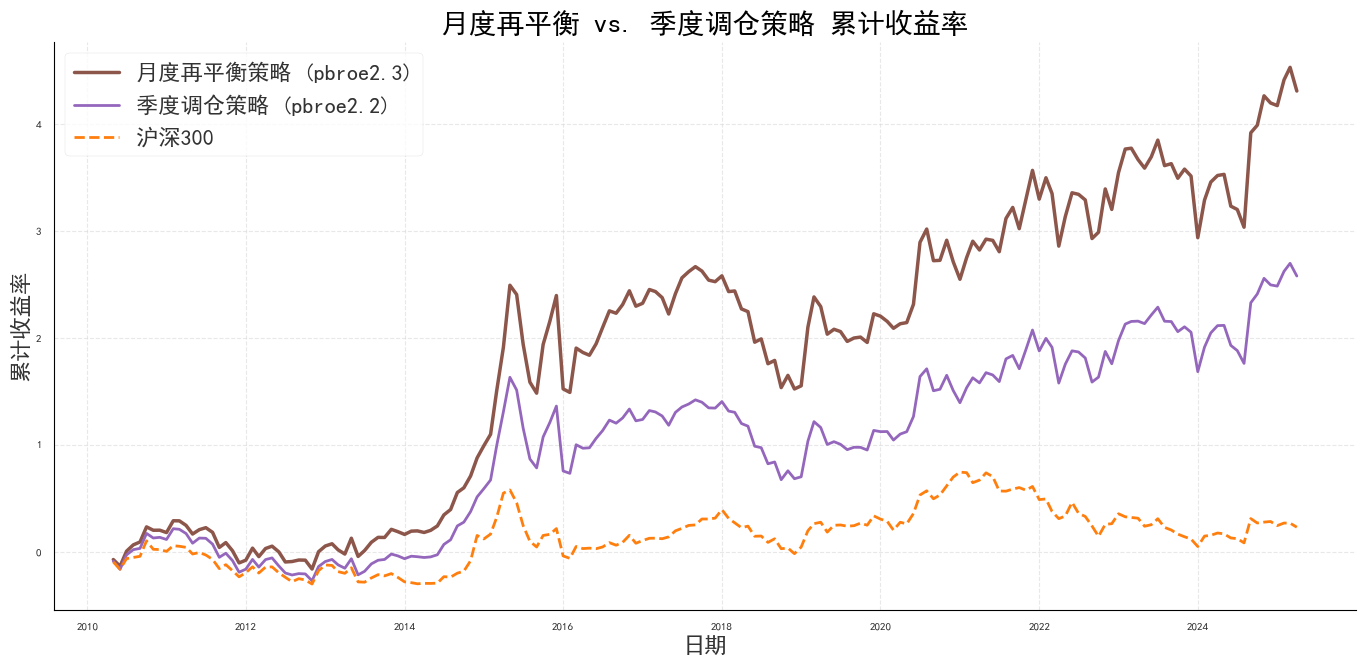

--- 正在绘制年度收益对比图 ---

--- 年度收益数据表 ---
      年份   月度再平衡策略    季度调仓策略
0   2010  0.246238  0.170213
1   2011 -0.173393 -0.208330
2   2012 -0.050561 -0.087564
3   2013  0.206636  0.118957
4   2014  1.468817  1.442261
5   2015 -0.016708 -0.147815
6   2016  0.179191  0.153261
7   2017 -0.031246 -0.031001
8   2018  0.006596 -0.017021
9   2019 -0.048774 -0.028370
10  2020  0.220354  0.228082
11  2021  0.009473 -0.000713
12  2022  0.209848  0.224834
13  2023 -0.031937 -0.013281
14  2024  0.174926  0.148973
年度收益对比图已保存至: ch2_pics\comparison_monthly_vs_quarterly_annual.png



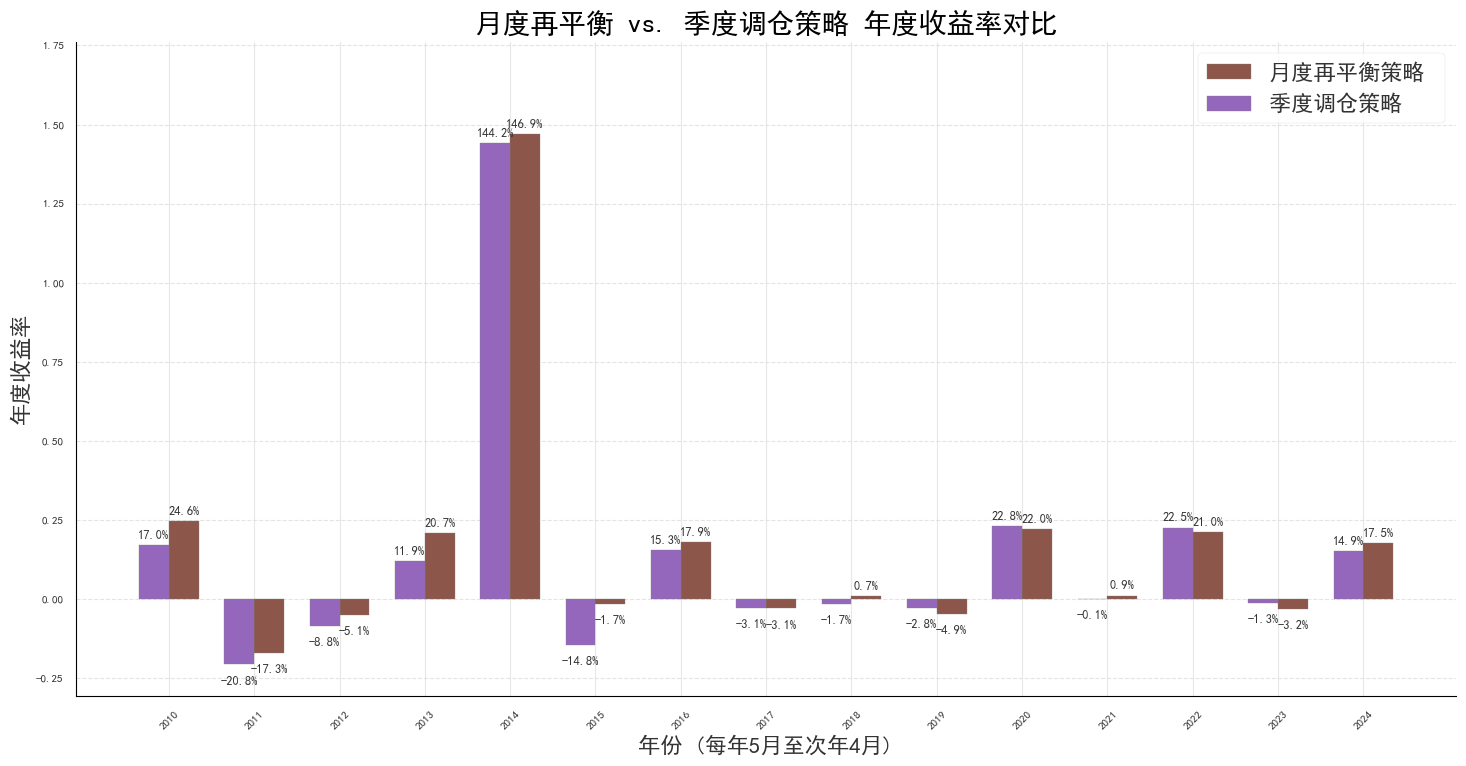

In [5]:
# 绘图：2.3 vs 2.2 双策略对比分析脚本
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# --- 1. 配置区域 ---

# 【请修改】确保以下文件路径正确
DATA_PATH = Path("E:/PBROE/ch2")

# 【已修复】将文件名与路径正确组合成 Path 对象
# 月度再平衡策略 (pbroe2.3) 的回测结果文件
FILE_MONTHLY_REBALANCE = DATA_PATH / 'pbroe2.3_returns.csv'

# 季度调仓策略 (pbroe2.2) 的回测结果文件
FILE_QUARTERLY_REBALANCE = DATA_PATH / 'pbroe2.2_returns.csv'

# 创建图片输出目录
output_dir = Path("./ch2_pics")
output_dir.mkdir(exist_ok=True)

# --- 配置绘图环境 ---
# 解决matplotlib中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-paper')
plt.rcParams['font.size'] = 18

def get_academic_colors(n, style='categorical'):
    """获取一个简单的颜色列表"""
    if style == 'categorical':
        # 蓝, 橙, 绿, 红, 紫, 棕
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
        return colors[:n]
    return None

# --- 2. 数据加载与合并 ---

def load_and_merge_strategies(file_monthly, file_quarterly):
    """加载两个策略的收益文件并合并"""
    print("--- 开始加载和合并数据 ---")
    try:
        # 加载月度再平衡策略数据
        df_monthly = pd.read_csv(file_monthly)
        df_monthly.rename(columns={
            'portfolio_return': 'return_monthly',
            'benchmark_return': 'benchmark_return' # 基准收益从此文件获取
        }, inplace=True)
        print(f"成功加载月度再平衡策略文件: {file_monthly.name}")

        # 加载季度调仓策略数据
        df_quarterly = pd.read_csv(file_quarterly)
        df_quarterly.rename(columns={
            'portfolio_return': 'return_quarterly'
        }, inplace=True)
        print(f"成功加载季度调仓策略文件: {file_quarterly.name}")

    except FileNotFoundError as e:
        print(f"错误: 无法找到文件 {e.filename}。请检查文件路径配置。")
        return None

    # 统一日期格式
    df_monthly['date'] = pd.to_datetime(df_monthly['date'])
    df_quarterly['date'] = pd.to_datetime(df_quarterly['date'])

    # 使用外连接合并，确保所有日期都包含
    df_merged = pd.merge(
        df_monthly[['date', 'return_monthly', 'benchmark_return']],
        df_quarterly[['date', 'return_quarterly']],
        on='date',
        how='outer'
    ).sort_values('date').set_index('date')

    # 填充可能因合并产生的缺失值
    df_merged.fillna(0, inplace=True)

    print("数据加载和合并完成。\n")
    return df_merged

# 合并数据
df_compare = load_and_merge_strategies(FILE_MONTHLY_REBALANCE, FILE_QUARTERLY_REBALANCE)

if df_compare is None:
    exit() # 如果数据加载失败，则退出

# --- 3. 绘制累计收益曲线 (三线对比) ---

def plot_cumulative_returns(df):
    """绘制两个策略与基准的累计收益曲线"""
    print("--- 正在绘制累计收益曲线 ---")
    # 计算三个系列的累计收益
    df['cum_ret_monthly'] = (1 + df['return_monthly']).cumprod() - 1
    df['cum_ret_quarterly'] = (1 + df['return_quarterly']).cumprod() - 1
    df['cum_ret_benchmark'] = (1 + df['benchmark_return']).cumprod() - 1

    colors = get_academic_colors(6) # 获取颜色

    plt.figure(figsize=(14, 7))

    # 绘制曲线
    plt.plot(df.index, df['cum_ret_monthly'], label='月度再平衡策略 (pbroe2.3)', color=colors[5], linewidth=2.5) # 棕色，稍粗
    plt.plot(df.index, df['cum_ret_quarterly'], label='季度调仓策略 (pbroe2.2)', color=colors[4], linewidth=2) # 紫色
    plt.plot(df.index, df['cum_ret_benchmark'], label='沪深300', color=colors[1], linestyle='--', linewidth=2) # 橙色虚线

    plt.title('月度再平衡 vs. 季度调仓策略 累计收益率', fontsize=20)
    plt.xlabel('日期', fontsize=16)
    plt.ylabel('累计收益率', fontsize=16)
    plt.legend(fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    save_path = output_dir / 'comparison_monthly_vs_quarterly_cumulative.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"累计收益对比图已保存至: {save_path}\n")
    plt.show()

plot_cumulative_returns(df_compare)


# --- 4. 绘制年度收益对比柱状图 ---

def plot_annual_returns(df):
    """绘制两个策略的年度收益对比柱状图"""
    print("--- 正在绘制年度收益对比图 ---")
    # 确定策略年度 (每年5月1日为新年度起点)
    df['策略年度'] = df.index.year - (df.index.month < 5)

    # 计算年度收益
    annual_returns = df.groupby('策略年度')[['return_monthly', 'return_quarterly']].apply(lambda x: (1 + x).prod() - 1).reset_index()
    annual_returns.rename(columns={
        'return_monthly': '月度再平衡策略',
        'return_quarterly': '季度调仓策略',
        '策略年度': '年份'
    }, inplace=True)

    print("\n--- 年度收益数据表 ---")
    print(annual_returns)

    plt.figure(figsize=(15, 8))

    bar_width = 0.35
    r1 = np.arange(len(annual_returns['年份']))
    r2 = [x + bar_width for x in r1]

    colors = get_academic_colors(6)

    # 【已修改】确保 r2 (右侧) 对应月度再平衡策略，r1 (左侧) 对应季度调仓策略
    bars1 = plt.bar(r2, annual_returns['月度再平衡策略'], color=colors[5], width=bar_width, edgecolor='grey', label='月度再平衡策略 ')
    bars2 = plt.bar(r1, annual_returns['季度调仓策略'], color=colors[4], width=bar_width, edgecolor='grey', label='季度调仓策略 ')

    plt.title('月度再平衡 vs. 季度调仓策略 年度收益率对比', fontsize=20)
    plt.xlabel('年份 (每年5月至次年4月)', fontsize=16)
    plt.ylabel('年度收益率', fontsize=16)
    plt.xticks([r + bar_width/2 for r in range(len(annual_returns['年份']))], annual_returns['年份'], rotation=45)
    plt.legend(fontsize=16)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            va = 'bottom' if height >= 0 else 'top'
            offset = 3 if height >= 0 else -8
            plt.annotate(f'{height:.1%}', xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, offset), textcoords="offset points", ha='center', va=va, fontsize=9)

    add_labels(bars1)
    add_labels(bars2)

    min_y = min(annual_returns['月度再平衡策略'].min(), annual_returns['季度调仓策略'].min())
    max_y = max(annual_returns['月度再平衡策略'].max(), annual_returns['季度调仓策略'].max())
    plt.ylim(min(min_y * 1.2, min_y - 0.1), max(max_y * 1.2, max_y + 0.1))
    plt.tight_layout()

    save_path = output_dir / 'comparison_monthly_vs_quarterly_annual.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"年度收益对比图已保存至: {save_path}\n")
    plt.show()

plot_annual_returns(df_compare)


--- 开始加载和合并所有策略数据 ---
成功加载: strategy_monthly_returns_vs_benchmark.csv
成功加载: pbroe2.1_returns.csv
成功加载: pbroe2.2_returns.csv
成功加载: pbroe2.3_returns.csv
所有策略数据加载和合并完成。

--- 正在绘制全策略演进累计收益曲线 ---
全策略对比图已保存至: ch2_pics\comparison_all_strategies_evolution.png



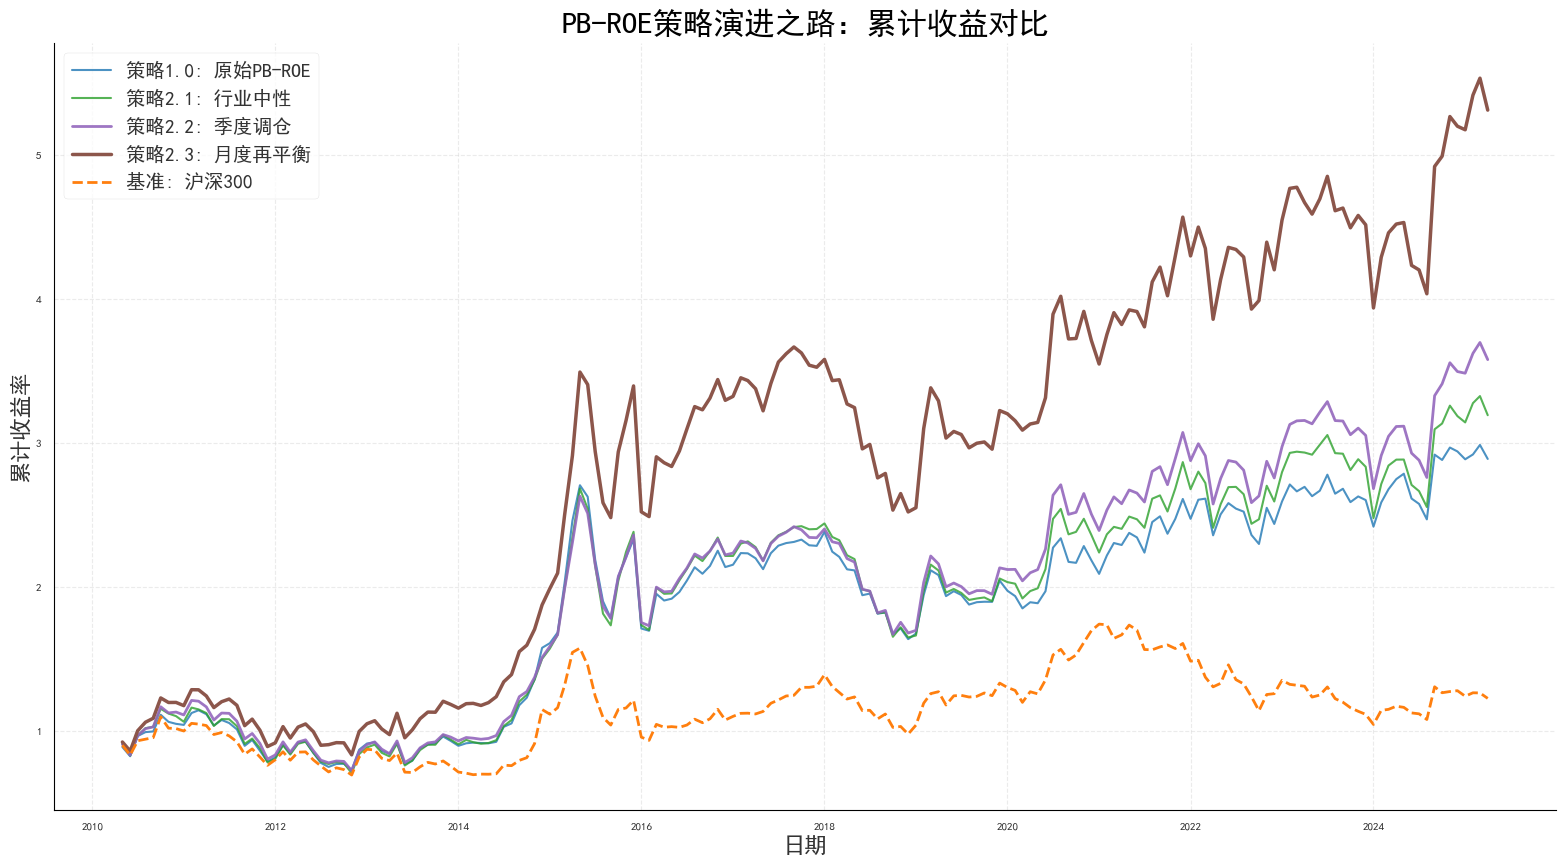

In [9]:
# 全策略对比分析脚本
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from functools import reduce

# =================================================================== #
#                           【1. 配置区域】                           #
# =================================================================== #

# --- 文件路径配置 ---
# 【请修改】确保以下文件路径正确
DATA_PATH = Path("E:/PBROE/data")
CH1_PATH = Path("E:/PBROE/ch1")
CH2_PATH = Path("E:/PBROE/ch2")

# 策略1: 原始PB-ROE策略 (ch1)
FILE_ORIGINAL = CH1_PATH / 'strategy_monthly_returns_vs_benchmark.csv'
# 策略2: 行业中性策略 (pbroe2.1)
FILE_INDUSTRY_NEUTRAL = CH2_PATH / 'pbroe2.1_returns.csv'
# 策略3: 季度调仓策略 (pbroe2.2)
FILE_QUARTERLY = CH2_PATH / 'pbroe2.2_returns.csv'
# 策略4: 月度再平衡策略 (pbroe2.3)
FILE_MONTHLY = CH2_PATH / 'pbroe2.3_returns.csv'

# --- 输出配置 ---
# 创建一个新的目录来保存对比图片
output_dir = Path("./ch2_pics")
output_dir.mkdir(exist_ok=True)


# --- 配置绘图环境 ---
# 解决matplotlib中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-paper')
plt.rcParams['font.size'] = 18

def get_academic_colors(n, style='categorical'):
    """获取一个简单的颜色列表"""
    if style == 'categorical':
        # 蓝, 橙, 绿, 红, 紫, 棕
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
        return colors[:n]
    return None

# =================================================================== #
#                       【2. 数据加载与合并】                         #
# =================================================================== #

def load_and_merge_all_strategies(files_dict):
    """加载所有策略的收益文件并合并"""
    print("--- 开始加载和合并所有策略数据 ---")

    dataframes = []

    # 依次加载并预处理每个文件
    try:
        # 策略1: 原始策略
        df_orig = pd.read_csv(files_dict['orig'])
        df_orig.rename(columns={
            '月份': 'date',
            '组合月收益率': 'return_orig',
            '基准月收益率': 'benchmark_return',
        }, inplace=True)
        df_orig['date'] = pd.to_datetime(df_orig['date'])
        dataframes.append(df_orig[['date', 'return_orig', 'benchmark_return']])
        print(f"成功加载: {files_dict['orig'].name}")

        # 策略2: 行业中性
        df_neutral = pd.read_csv(files_dict['neutral'])
        df_neutral.rename(columns={'portfolio_return': 'return_neutral'}, inplace=True)
        df_neutral['date'] = pd.to_datetime(df_neutral['date'])
        dataframes.append(df_neutral[['date', 'return_neutral']])
        print(f"成功加载: {files_dict['neutral'].name}")

        # 策略3: 季度调仓
        df_quarterly = pd.read_csv(files_dict['quarterly'])
        df_quarterly.rename(columns={'portfolio_return': 'return_quarterly'}, inplace=True)
        df_quarterly['date'] = pd.to_datetime(df_quarterly['date'])
        dataframes.append(df_quarterly[['date', 'return_quarterly']])
        print(f"成功加载: {files_dict['quarterly'].name}")

        # 策略4: 月度再平衡
        df_monthly = pd.read_csv(files_dict['monthly'])
        df_monthly.rename(columns={'portfolio_return': 'return_monthly'}, inplace=True)
        df_monthly['date'] = pd.to_datetime(df_monthly['date'])
        dataframes.append(df_monthly[['date', 'return_monthly']])
        print(f"成功加载: {files_dict['monthly'].name}")

    except FileNotFoundError as e:
        print(f"错误: 无法找到文件 {e.filename}。请检查文件路径配置。")
        return None

    # 使用 reduce 函数链式合并所有 DataFrame
    df_merged = reduce(lambda left, right: pd.merge(left, right, on='date', how='outer'), dataframes)
    df_merged = df_merged.sort_values('date').set_index('date')

    # 填充可能因合并产生的缺失值
    df_merged.fillna(0, inplace=True)

    print("所有策略数据加载和合并完成。\n")
    return df_merged

# =================================================================== #
#                       【3. 绘制累计收益曲线】                       #
# =================================================================== #

def plot_all_strategies_cumulative(df):
    """绘制所有策略与基准的累计收益曲线"""
    print("--- 正在绘制全策略演进累计收益曲线 ---")

    # 计算所有系列的累计收益
    df['cum_ret_orig'] = (1 + df['return_orig']).cumprod()
    df['cum_ret_neutral'] = (1 + df['return_neutral']).cumprod()
    df['cum_ret_quarterly'] = (1 + df['return_quarterly']).cumprod()
    df['cum_ret_monthly'] = (1 + df['return_monthly']).cumprod()
    df['cum_ret_benchmark'] = (1 + df['benchmark_return']).cumprod()

    colors = get_academic_colors(6) # 获取颜色

    plt.figure(figsize=(16, 9))

    # 绘制曲线
    plt.plot(df.index, df['cum_ret_orig'], label='策略1.0: 原始PB-ROE', color=colors[0], linewidth=1.5, alpha=0.8)
    plt.plot(df.index, df['cum_ret_neutral'], label='策略2.1: 行业中性', color=colors[2], linewidth=1.5, alpha=0.8)
    plt.plot(df.index, df['cum_ret_quarterly'], label='策略2.2: 季度调仓', color=colors[4], linewidth=2.0, alpha=0.9)
    plt.plot(df.index, df['cum_ret_monthly'], label='策略2.3: 月度再平衡', color=colors[5], linewidth=2.5)
    plt.plot(df.index, df['cum_ret_benchmark'], label='基准: 沪深300', color=colors[1], linestyle='--', linewidth=2)

    plt.title('PB-ROE策略演进之路：累计收益对比', fontsize=22)
    plt.xlabel('日期', fontsize=16)
    plt.ylabel('累计净值', fontsize=16)
    plt.ylabel('累计收益率', fontsize=16)
    plt.legend(fontsize=14, loc='upper left')
    plt.grid(True, which="both", linestyle='--', alpha=0.5)
    plt.tight_layout()

    save_path = output_dir / 'comparison_all_strategies_evolution.png'
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"全策略对比图已保存至: {save_path}\n")
    plt.show()

# =================================================================== #
#                           【4. 主函数执行】                         #
# =================================================================== #

def main():
    files = {
        'orig': FILE_ORIGINAL,
        'neutral': FILE_INDUSTRY_NEUTRAL,
        'quarterly': FILE_QUARTERLY,
        'monthly': FILE_MONTHLY
    }

    df_all_strategies = load_and_merge_all_strategies(files)

    if df_all_strategies is not None:
        plot_all_strategies_cumulative(df_all_strategies)

if __name__ == "__main__":
    main()
